# Define Library

In [104]:
# %% [markdown]
# # Jupyter Notebook Loading Header
#
# This is a custom loading header for Jupyter Notebooks in Visual Studio Code.
# It includes common imports and settings to get you started quickly.
# %% [markdown]
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery
from google.cloud import storage
import os
import tempfile
import time
from datetime import datetime
import uuid
import joblib
import uuid

import gcsfs
import duckdb as dd
import pickle
import joblib
from typing import Union
import io

path = r'C:\Users\Dwaipayan\AppData\Roaming\gcloud\legacy_credentials\dchakroborti@tonikbank.com\adc.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = path
client = bigquery.Client(project='prj-prod-dataplatform')
os.environ["GOOGLE_CLOUD_PROJECT"] = "prj-prod-dataplatform"
# %% [markdown]
## Configure Settings
# Set options or configurations as needed
pd.set_option('display.max_columns', None)
pd.set_option("Display.max_rows", 100)

# Function

In [105]:
# import pandas as pd
# import numpy as np
# from typing import List, Dict, Tuple

# def calculate_population_stability_index(
#     df: pd.DataFrame, 
#     feature_list: List[str], 
#     segment_columns: List[str], 
#     month_column: str = 'Application_month'
# ) -> pd.DataFrame:
#     """
#     Calculate Population Stability Index (PSI) for features overall and by segments.
    
#     Parameters:
#     -----------
#     df : pd.DataFrame
#         Input dataframe with features and segments
#     feature_list : List[str]
#         List of feature names to calculate PSI for
#     segment_columns : List[str]
#         List of segment column names
#     month_column : str
#         Name of the month column (default: 'Application_month')
    
#     Returns:
#     --------
#     pd.DataFrame
#         DataFrame with PSI values for each feature, segment, and month
#     """
    
#     # Identify feature types
#     def identify_feature_types(df: pd.DataFrame, feature_list: List[str]) -> Dict[str, str]:
#         """Identify categorical vs numerical features"""
#         feature_types = {}
        
#         for feature in feature_list:
#             # Check if feature exists in dataframe
#             if feature not in df.columns:
#                 print(f"Warning: Feature '{feature}' not found in dataframe")
#                 continue
                
#             # Check data type and unique values
#             unique_vals = df[feature].nunique()
#             dtype = df[feature].dtype
            
#             # Rules for categorical features
#             if (dtype == 'object' or 
#                 unique_vals <= 10 or 
#                 feature in ['cic_ScoreRange', 'cic_ln_loan_level_user_type', 
#                           'cic_has_ever_been_overdue', 'cic_latest_granted_contract_overdue_flag',
#                           'cic_flg_zero_non_granted_ever', 'cic_flg_zero_granted_ever']):
#                 feature_types[feature] = 'categorical'
#             else:
#                 feature_types[feature] = 'numerical'
                
#         return feature_types
    
#     # Create bins for numerical features
#     def create_numerical_bins(baseline_data: pd.Series, n_bins: int = 10) -> pd.IntervalIndex:
#         """Create bins for numerical features using deciles"""
#         # Remove null values
#         clean_data = baseline_data.dropna()
        
#         if len(clean_data) == 0:
#             return None
            
#         # Create decile bins
#         try:
#             bins = pd.qcut(clean_data, n_bins, duplicates='drop', retbins=True)[1]
#             # Ensure bins are unique and in order
#             bins = sorted(set(bins))
#             return pd.IntervalIndex.from_breaks(bins)
#         except:
#             # Fallback to equal width bins if deciles fail
#             min_val = clean_data.min()
#             max_val = clean_data.max()
#             bins = np.linspace(min_val, max_val, n_bins + 1)
#             return pd.IntervalIndex.from_breaks(bins)
    
#     # Process categorical features
#     def process_categorical_feature(baseline_data: pd.Series, top_n: int = 6) -> List:
#         """Get top N categories and group rest as 'Other'"""
#         value_counts = baseline_data.value_counts()
#         top_categories = value_counts.head(top_n).index.tolist()
#         return top_categories
    
#     # Calculate distribution
#     def calculate_distribution(data: pd.Series, feature_type: str, 
#                             bins: pd.IntervalIndex = None, 
#                             top_categories: List = None) -> Dict:
#         """Calculate distribution of data"""
#         if feature_type == 'numerical':
#             return calculate_numerical_distribution(data, bins)
#         else:
#             return calculate_categorical_distribution(data, top_categories)
    
#     def calculate_numerical_distribution(data: pd.Series, bins: pd.IntervalIndex) -> Dict:
#         """Calculate distribution for numerical data"""
#         if bins is None:
#             return {}
            
#         clean_data = data.dropna()
#         if len(clean_data) == 0:
#             return {bin_: 0 for bin_ in bins}
        
#         binned = pd.cut(clean_data, bins, include_lowest=True)
#         distribution = binned.value_counts().sort_index()
#         total = len(clean_data)
        
#         return {str(interval): count/total if total > 0 else 0 
#                 for interval, count in distribution.items()}
    
#     def calculate_categorical_distribution(data: pd.Series, top_categories: List) -> Dict:
#         """Calculate distribution for categorical data"""
#         if top_categories is None:
#             return {}
            
#         value_counts = data.value_counts()
#         total = len(data.dropna())
        
#         distribution = {}
#         for category in top_categories:
#             if category in value_counts:
#                 distribution[category] = value_counts[category] / total if total > 0 else 0
#             else:
#                 distribution[category] = 0
                
#         # Calculate "Other" category
#         other_categories = [cat for cat in value_counts.index if cat not in top_categories]
#         other_count = value_counts[other_categories].sum() if other_categories else 0
#         distribution['Other'] = other_count / total if total > 0 else 0
        
#         return distribution
    
#     # Calculate PSI
#     def calculate_psi(expected_dist: Dict, actual_dist: Dict) -> float:
#         """Calculate Population Stability Index"""
#         psi = 0
#         all_categories = set(expected_dist.keys()) | set(actual_dist.keys())
        
#         for category in all_categories:
#             expected_pct = expected_dist.get(category, 1e-6)  # Avoid division by zero
#             actual_pct = actual_dist.get(category, 1e-6)
            
#             # Avoid log(0) by using small epsilon
#             if expected_pct == 0:
#                 expected_pct = 1e-6
#             if actual_pct == 0:
#                 actual_pct = 1e-6
                
#             psi_component = (actual_pct - expected_pct) * np.log(actual_pct / expected_pct)
#             psi += psi_component
            
#         return psi
    
#     # Main PSI calculation logic
#     def calculate_psi_for_feature(df: pd.DataFrame, feature: str, feature_type: str, 
#                                 month_column: str, segment_info: Tuple[str, str] = None) -> pd.DataFrame:
#         """Calculate PSI for a specific feature"""
        
#         # Filter data if segment is specified
#         if segment_info:
#             segment_col, segment_val = segment_info
#             segment_data = df[df[segment_col] == segment_val].copy()
#         else:
#             segment_data = df.copy()
#             segment_info = ('Overall', 'Overall')
        
#         # Get baseline month (minimum month)
#         months = sorted(segment_data[month_column].unique())
#         if len(months) < 2:
#             return pd.DataFrame()  # Need at least 2 months for comparison
            
#         baseline_month = months[0]
        
#         # Get baseline data
#         baseline_data = segment_data[segment_data[month_column] == baseline_month][feature]
        
#         # Skip if baseline data is empty
#         if len(baseline_data.dropna()) == 0:
#             return pd.DataFrame()
        
#         # Prepare bins or categories based on baseline
#         if feature_type == 'numerical':
#             bins = create_numerical_bins(baseline_data)
#             top_categories = None
#         else:
#             bins = None
#             top_categories = process_categorical_feature(baseline_data)
        
#         # Calculate baseline distribution
#         baseline_dist = calculate_distribution(baseline_data, feature_type, bins, top_categories)
        
#         # Calculate PSI for each month compared to baseline
#         results = []
#         for current_month in months[1:]:  # Skip baseline month
#             current_data = segment_data[segment_data[month_column] == current_month][feature]
            
#             if len(current_data.dropna()) == 0:
#                 continue
                
#             current_dist = calculate_distribution(current_data, feature_type, bins, top_categories)
#             psi_value = calculate_psi(baseline_dist, current_dist)
            
#             results.append({
#                 'feature': feature,
#                 'feature_type': feature_type,
#                 'segment_column': segment_info[0],
#                 'segment_value': segment_info[1],
#                 'baseline_month': baseline_month,
#                 'current_month': current_month,
#                 'psi': psi_value,
#                 'num_baseline_records': len(baseline_data),
#                 'num_current_records': len(current_data)
#             })
        
#         return pd.DataFrame(results)
    
#     # Main execution
#     print("Identifying feature types...")
#     feature_types = identify_feature_types(df, feature_list)
    
#     # Prepare results dataframe
#     all_results = []
    
#     # Calculate PSI overall (no segmentation)
#     print("Calculating overall PSI...")
#     for feature, ftype in feature_types.items():
#         print(f"  Processing {feature} ({ftype})")
#         result_df = calculate_psi_for_feature(df, feature, ftype, month_column)
#         if not result_df.empty:
#             all_results.append(result_df)
    
#     # Calculate PSI for each segment
#     print("Calculating segment-wise PSI...")
#     for segment_col in segment_columns:
#         if segment_col not in df.columns:
#             print(f"Warning: Segment column '{segment_col}' not found in dataframe")
#             continue
            
#         segment_values = df[segment_col].dropna().unique()
#         print(f"  Processing segment: {segment_col} ({len(segment_values)} values)")
        
#         for segment_val in segment_values:
#             for feature, ftype in feature_types.items():
#                 result_df = calculate_psi_for_feature(
#                     df, feature, ftype, month_column, (segment_col, segment_val)
#                 )
#                 if not result_df.empty:
#                     all_results.append(result_df)
    
#     # Combine all results
#     if all_results:
#         final_results = pd.concat(all_results, ignore_index=True)
        
#         # Add PSI interpretation
#         def interpret_psi(psi_value):
#             if psi_value < 0.1:
#                 return 'No significant change'
#             elif psi_value < 0.2:
#                 return 'Minor change'
#             elif psi_value < 0.5:
#                 return 'Moderate change'
#             else:
#                 return 'Significant change'
        
#         final_results['psi_interpretation'] = final_results['psi'].apply(interpret_psi)
        
#         return final_results.sort_values(['feature', 'segment_column', 'segment_value', 'current_month'])
#     else:
#         return pd.DataFrame()



In [106]:
import pandas as pd
import numpy as np
from typing import List, Dict, Tuple, Optional

def calculate_population_stability_index(
    df: pd.DataFrame, 
    feature_list: List[str], 
    segment_columns: List[str], 
    month_column: str = 'Application_month',
    baseline_month: Optional[str] = None
) -> pd.DataFrame:
    """
    Calculate Population Stability Index (PSI) for features overall and by segments.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Input dataframe with features and segments
    feature_list : List[str]
        List of feature names to calculate PSI for
    segment_columns : List[str]
        List of segment column names
    month_column : str
        Name of the month column (default: 'Application_month')
    baseline_month : str, optional
        Specific baseline month to use. If None, uses minimum month
    
    Returns:
    --------
    pd.DataFrame
        DataFrame with PSI values for each feature, segment, and month
    """
    
    # Identify feature types
    def identify_feature_types(df: pd.DataFrame, feature_list: List[str]) -> Dict[str, str]:
        """Identify categorical vs numerical features"""
        feature_types = {}
        
        for feature in feature_list:
            # Check if feature exists in dataframe
            if feature not in df.columns:
                print(f"Warning: Feature '{feature}' not found in dataframe")
                continue
                
            # Check data type and unique values
            unique_vals = df[feature].nunique()
            dtype = df[feature].dtype
            
            # Rules for categorical features
            if (dtype == 'object' or 
                unique_vals <= 10 or 
                feature in ['cic_ScoreRange', 'cic_ln_loan_level_user_type', 
                          'cic_has_ever_been_overdue', 'cic_latest_granted_contract_overdue_flag',
                          'cic_flg_zero_non_granted_ever', 'cic_flg_zero_granted_ever']):
                feature_types[feature] = 'categorical'
            else:
                feature_types[feature] = 'numerical'
                
        return feature_types
    
    # Create bins for numerical features
    def create_numerical_bins(baseline_data: pd.Series, n_bins: int = 10) -> pd.IntervalIndex:
        """Create bins for numerical features using deciles"""
        # Remove null values
        clean_data = baseline_data.dropna()
        
        if len(clean_data) == 0:
            return None
            
        # Create decile bins
        try:
            bins = pd.qcut(clean_data, n_bins, duplicates='drop', retbins=True)[1]
            # Ensure bins are unique and in order
            bins = sorted(set(bins))
            return pd.IntervalIndex.from_breaks(bins)
        except:
            # Fallback to equal width bins if deciles fail
            min_val = clean_data.min()
            max_val = clean_data.max()
            bins = np.linspace(min_val, max_val, n_bins + 1)
            return pd.IntervalIndex.from_breaks(bins)
    
    # Process categorical features
    def process_categorical_feature(baseline_data: pd.Series, top_n: int = 6) -> List:
        """Get top N categories and group rest as 'Other'"""
        value_counts = baseline_data.value_counts()
        top_categories = value_counts.head(top_n).index.tolist()
        return top_categories
    
    # Calculate distribution
    def calculate_distribution(data: pd.Series, feature_type: str, 
                            bins: pd.IntervalIndex = None, 
                            top_categories: List = None) -> Dict:
        """Calculate distribution of data"""
        if feature_type == 'numerical':
            return calculate_numerical_distribution(data, bins)
        else:
            return calculate_categorical_distribution(data, top_categories)
    
    def calculate_numerical_distribution(data: pd.Series, bins: pd.IntervalIndex) -> Dict:
        """Calculate distribution for numerical data"""
        if bins is None:
            return {}
            
        clean_data = data.dropna()
        if len(clean_data) == 0:
            return {str(bin_): 0 for bin_ in bins}
        
        binned = pd.cut(clean_data, bins, include_lowest=True)
        distribution = binned.value_counts().sort_index()
        total = len(clean_data)
        
        return {str(interval): count/total if total > 0 else 0 
                for interval, count in distribution.items()}
    
    def calculate_categorical_distribution(data: pd.Series, top_categories: List) -> Dict:
        """Calculate distribution for categorical data"""
        if top_categories is None:
            return {}
            
        value_counts = data.value_counts()
        total = len(data.dropna())
        
        distribution = {}
        for category in top_categories:
            if category in value_counts:
                distribution[category] = value_counts[category] / total if total > 0 else 0
            else:
                distribution[category] = 0
                
        # Calculate "Other" category
        other_categories = [cat for cat in value_counts.index if cat not in top_categories]
        other_count = value_counts[other_categories].sum() if other_categories else 0
        distribution['Other'] = other_count / total if total > 0 else 0
        
        return distribution
    
    # Calculate PSI
    def calculate_psi(expected_dist: Dict, actual_dist: Dict) -> float:
        """Calculate Population Stability Index"""
        psi = 0
        all_categories = set(expected_dist.keys()) | set(actual_dist.keys())
        
        for category in all_categories:
            expected_pct = expected_dist.get(category, 1e-6)  # Avoid division by zero
            actual_pct = actual_dist.get(category, 1e-6)
            
            # Avoid log(0) by using small epsilon
            if expected_pct == 0:
                expected_pct = 1e-6
            if actual_pct == 0:
                actual_pct = 1e-6
                
            psi_component = (actual_pct - expected_pct) * np.log(actual_pct / expected_pct)
            psi += psi_component
            
        return psi
    
    # Main PSI calculation logic
    def calculate_psi_for_feature(df: pd.DataFrame, feature: str, feature_type: str, 
                                month_column: str, segment_info: Tuple[str, str] = None) -> pd.DataFrame:
        """Calculate PSI for a specific feature"""
        
        # Filter data if segment is specified
        if segment_info:
            segment_col, segment_val = segment_info
            segment_data = df[df[segment_col] == segment_val].copy()
        else:
            segment_data = df.copy()
            segment_info = ('Overall', 'Overall')
        
        # Get months and baseline
        months = sorted(segment_data[month_column].unique())
        if len(months) < 2:
            return pd.DataFrame()  # Need at least 2 months for comparison
            
        if baseline_month:
            if baseline_month not in months:
                print(f"Warning: Baseline month {baseline_month} not found in segment {segment_info}")
                return pd.DataFrame()
            baseline_month_used = baseline_month
        else:
            baseline_month_used = months[0]
        
        # Get baseline data
        baseline_data = segment_data[segment_data[month_column] == baseline_month_used][feature]
        
        # Skip if baseline data is empty
        if len(baseline_data.dropna()) == 0:
            return pd.DataFrame()
        
        # Prepare bins or categories based on baseline
        if feature_type == 'numerical':
            bins = create_numerical_bins(baseline_data)
            top_categories = None
        else:
            bins = None
            top_categories = process_categorical_feature(baseline_data)
        
        # Calculate baseline distribution
        baseline_dist = calculate_distribution(baseline_data, feature_type, bins, top_categories)
        
        # Calculate PSI for each month compared to baseline
        results = []
        for current_month in months:
            if current_month == baseline_month_used:
                continue  # Skip comparison of baseline with itself
                
            current_data = segment_data[segment_data[month_column] == current_month][feature]
            
            if len(current_data.dropna()) == 0:
                continue
                
            current_dist = calculate_distribution(current_data, feature_type, bins, top_categories)
            psi_value = calculate_psi(baseline_dist, current_dist)
            
            results.append({
                'feature': feature,
                'feature_type': feature_type,
                'segment_column': segment_info[0],
                'segment_value': segment_info[1],
                'baseline_month': baseline_month_used,
                'current_month': current_month,
                'psi': psi_value,
                'num_baseline_records': len(baseline_data),
                'num_current_records': len(current_data)
            })
        
        return pd.DataFrame(results)
    
    # Main execution
    print("Identifying feature types...")
    feature_types = identify_feature_types(df, feature_list)
    
    # Prepare results dataframe
    all_results = []
    
    # Calculate PSI overall (no segmentation)
    print("Calculating overall PSI...")
    for feature, ftype in feature_types.items():
        print(f"  Processing {feature} ({ftype})")
        result_df = calculate_psi_for_feature(df, feature, ftype, month_column)
        if not result_df.empty:
            all_results.append(result_df)
    
    # Calculate PSI for each segment
    print("Calculating segment-wise PSI...")
    for segment_col in segment_columns:
        if segment_col not in df.columns:
            print(f"Warning: Segment column '{segment_col}' not found in dataframe")
            continue
            
        segment_values = df[segment_col].dropna().unique()
        print(f"  Processing segment: {segment_col} ({len(segment_values)} values)")
        
        for segment_val in segment_values:
            for feature, ftype in feature_types.items():
                result_df = calculate_psi_for_feature(
                    df, feature, ftype, month_column, (segment_col, segment_val)
                )
                if not result_df.empty:
                    all_results.append(result_df)
    
    # Combine all results
    if all_results:
        final_results = pd.concat(all_results, ignore_index=True)
        
        # Add PSI interpretation
        def interpret_psi(psi_value):
            if psi_value < 0.1:
                return 'No significant change'
            elif psi_value < 0.2:
                return 'Minor change'
            elif psi_value < 0.5:
                return 'Moderate change'
            else:
                return 'Significant change'
        
        final_results['psi_interpretation'] = final_results['psi'].apply(interpret_psi)
        
        return final_results.sort_values(['feature', 'segment_column', 'segment_value', 'current_month'])
    else:
        return pd.DataFrame()

def calculate_bin_level_psi(
    df: pd.DataFrame,
    feature_list: List[str],
    segment_columns: List[str],
    month_column: str = 'Application_month',
    baseline_month: Optional[str] = None,
    top_n_categories: int = 6
) -> pd.DataFrame:
    """
    Calculate bin-level PSI details showing distribution changes for each bin/category.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Input dataframe with features and segments
    feature_list : List[str]
        List of feature names to calculate PSI for
    segment_columns : List[str]
        List of segment column names
    month_column : str
        Name of the month column
    baseline_month : str, optional
        Specific baseline month to use
    top_n_categories : int
        Number of top categories to keep for categorical features
    
    Returns:
    --------
    pd.DataFrame
        DataFrame with bin-level PSI details
    """
    
    def identify_feature_types(df: pd.DataFrame, feature_list: List[str]) -> Dict[str, str]:
        """Identify categorical vs numerical features"""
        feature_types = {}
        for feature in feature_list:
            if feature not in df.columns:
                continue
            unique_vals = df[feature].nunique()
            dtype = df[feature].dtype
            
            if (dtype == 'object' or unique_vals <= 10 or 
                feature in ['cic_ScoreRange', 'cic_ln_loan_level_user_type', 
                          'cic_has_ever_been_overdue', 'cic_latest_granted_contract_overdue_flag',
                          'cic_flg_zero_non_granted_ever', 'cic_flg_zero_granted_ever']):
                feature_types[feature] = 'categorical'
            else:
                feature_types[feature] = 'numerical'
        return feature_types
    
    def create_numerical_bins(baseline_data: pd.Series, n_bins: int = 10) -> pd.IntervalIndex:
        """Create bins for numerical features"""
        clean_data = baseline_data.dropna()
        if len(clean_data) == 0:
            return None
        try:
            bins = pd.qcut(clean_data, n_bins, duplicates='drop', retbins=True)[1]
            bins = sorted(set(bins))
            return pd.IntervalIndex.from_breaks(bins)
        except:
            min_val = clean_data.min()
            max_val = clean_data.max()
            bins = np.linspace(min_val, max_val, n_bins + 1)
            return pd.IntervalIndex.from_breaks(bins)
    
    def get_bin_level_distribution(data: pd.Series, feature_type: str, 
                                 bins: pd.IntervalIndex = None, 
                                 top_categories: List = None) -> pd.DataFrame:
        """Get distribution at bin/category level"""
        if feature_type == 'numerical':
            return get_numerical_bin_distribution(data, bins)
        else:
            return get_categorical_bin_distribution(data, top_categories)
    
    def get_numerical_bin_distribution(data: pd.Series, bins: pd.IntervalIndex) -> pd.DataFrame:
        """Get numerical distribution by bin"""
        if bins is None:
            return pd.DataFrame()
            
        clean_data = data.dropna()
        if len(clean_data) == 0:
            return pd.DataFrame({'bin': [str(bin_) for bin_ in bins], 'count': 0, 'percentage': 0})
        
        binned = pd.cut(clean_data, bins, include_lowest=True)
        distribution = binned.value_counts().sort_index()
        total = len(clean_data)
        
        results = []
        for interval, count in distribution.items():
            results.append({
                'bin': str(interval),
                'count': count,
                'percentage': count / total if total > 0 else 0
            })
        
        # Add missing bins with zero count
        existing_bins = {str(interval) for interval in distribution.index}
        for bin_interval in bins:
            bin_str = str(bin_interval)
            if bin_str not in existing_bins:
                results.append({
                    'bin': bin_str,
                    'count': 0,
                    'percentage': 0
                })
        
        return pd.DataFrame(results)
    
    def get_categorical_bin_distribution(data: pd.Series, top_categories: List) -> pd.DataFrame:
        """Get categorical distribution by category"""
        if top_categories is None:
            return pd.DataFrame()
            
        value_counts = data.value_counts()
        total = len(data.dropna())
        
        results = []
        # Top categories
        for category in top_categories:
            count = value_counts.get(category, 0)
            results.append({
                'bin': str(category),
                'count': count,
                'percentage': count / total if total > 0 else 0
            })
        
        # Other categories
        other_categories = [cat for cat in value_counts.index if cat not in top_categories]
        other_count = value_counts[other_categories].sum() if other_categories else 0
        results.append({
            'bin': 'Other',
            'count': other_count,
            'percentage': other_count / total if total > 0 else 0
        })
        
        return pd.DataFrame(results)
    
    # Main execution for bin-level analysis
    print("Calculating bin-level PSI details...")
    feature_types = identify_feature_types(df, feature_list)
    all_bin_results = []
    
    # Process overall and segments
    segments_to_process = [('Overall', 'Overall')]  # Overall first
    for segment_col in segment_columns:
        if segment_col in df.columns:
            for segment_val in df[segment_col].dropna().unique():
                segments_to_process.append((segment_col, segment_val))
    
    for segment_info in segments_to_process:
        segment_col, segment_val = segment_info
        
        # Filter data for segment
        if segment_col == 'Overall':
            segment_data = df.copy()
        else:
            segment_data = df[df[segment_col] == segment_val].copy()
        
        # Get months and baseline
        months = sorted(segment_data[month_column].unique())
        if len(months) < 2:
            continue
            
        baseline_month_used = baseline_month if baseline_month else months[0]
        
        if baseline_month_used not in months:
            continue
        
        print(f"Processing segment: {segment_col}={segment_val}")
        
        for feature, ftype in feature_types.items():
            print(f"  Feature: {feature}")
            
            # Get baseline data and setup
            baseline_data = segment_data[segment_data[month_column] == baseline_month_used][feature]
            
            if len(baseline_data.dropna()) == 0:
                continue
            
            # Prepare bins/categories
            if ftype == 'numerical':
                bins = create_numerical_bins(baseline_data)
                top_categories = None
            else:
                bins = None
                top_categories = segment_data[segment_data[month_column] == baseline_month_used][feature].value_counts().head(top_n_categories).index.tolist()
            
            # Get baseline distribution
            baseline_dist_df = get_bin_level_distribution(baseline_data, ftype, bins, top_categories)
            baseline_dist_dict = dict(zip(baseline_dist_df['bin'], baseline_dist_df['percentage']))
            
            # Process each current month
            for current_month in months:
                if current_month == baseline_month_used:
                    continue
                    
                current_data = segment_data[segment_data[month_column] == current_month][feature]
                
                if len(current_data.dropna()) == 0:
                    continue
                
                current_dist_df = get_bin_level_distribution(current_data, ftype, bins, top_categories)
                current_dist_dict = dict(zip(current_dist_df['bin'], current_dist_df['percentage']))
                
                # Calculate PSI components for each bin
                all_bins = set(baseline_dist_dict.keys()) | set(current_dist_dict.keys())
                
                for bin_name in all_bins:
                    expected_pct = baseline_dist_dict.get(bin_name, 1e-6)
                    actual_pct = current_dist_dict.get(bin_name, 1e-6)
                    
                    # Calculate PSI component
                    if expected_pct == 0:
                        expected_pct = 1e-6
                    if actual_pct == 0:
                        actual_pct = 1e-6
                    
                    psi_component = (actual_pct - expected_pct) * np.log(actual_pct / expected_pct)
                    
                    # Get counts
                    baseline_count = baseline_dist_df[baseline_dist_df['bin'] == bin_name]['count'].iloc[0] if bin_name in baseline_dist_df['bin'].values else 0
                    current_count = current_dist_df[current_dist_df['bin'] == bin_name]['count'].iloc[0] if bin_name in current_dist_df['bin'].values else 0
                    
                    all_bin_results.append({
                        'feature': feature,
                        'feature_type': ftype,
                        'segment_column': segment_col,
                        'segment_value': segment_val,
                        'baseline_month': baseline_month_used,
                        'current_month': current_month,
                        'bin': bin_name,
                        'baseline_percentage': expected_pct,
                        'current_percentage': actual_pct,
                        'psi_component': psi_component,
                        'baseline_count': baseline_count,
                        'current_count': current_count,
                        'percentage_change': actual_pct - expected_pct
                    })
    
    if all_bin_results:
        bin_results_df = pd.DataFrame(all_bin_results)
        
        # Add interpretation for percentage changes
        def interpret_percentage_change(change):
            abs_change = abs(change)
            if abs_change < 0.01:
                return 'Very Small'
            elif abs_change < 0.05:
                return 'Small'
            elif abs_change < 0.1:
                return 'Moderate'
            else:
                return 'Large'
        
        bin_results_df['change_interpretation'] = bin_results_df['percentage_change'].apply(interpret_percentage_change)
        
        return bin_results_df.sort_values(['feature', 'segment_column', 'segment_value', 'current_month', 'bin'])
    else:
        return pd.DataFrame()

# Enhanced analysis functions
def analyze_psi_results(psi_df: pd.DataFrame):
    """
    Analyze and summarize PSI results
    """
    if psi_df.empty:
        print("No PSI results to analyze")
        return
    
    print("PSI Results Summary:")
    print("=" * 80)
    
    # Overall summary
    print(f"\nTotal PSI calculations: {len(psi_df)}")
    print(f"Features analyzed: {psi_df['feature'].nunique()}")
    print(f"Segments analyzed: {psi_df['segment_column'].nunique()}")
    print(f"Time periods analyzed: {psi_df['current_month'].nunique()}")
    
    # Features with highest average PSI
    feature_psi_avg = psi_df.groupby('feature')['psi'].mean().sort_values(ascending=False)
    print(f"\nTop 5 features with highest average PSI:")
    for feature, avg_psi in feature_psi_avg.head().items():
        print(f"  {feature}: {avg_psi:.4f}")
    
    # Segments with highest average PSI
    segment_psi_avg = psi_df.groupby('segment_column')['psi'].mean().sort_values(ascending=False)
    print(f"\nAverage PSI by segment:")
    for segment, avg_psi in segment_psi_avg.items():
        print(f"  {segment}: {avg_psi:.4f}")
    
    # PSI interpretation distribution
    interpretation_counts = psi_df['psi_interpretation'].value_counts()
    print(f"\nPSI Interpretation Distribution:")
    for interpretation, count in interpretation_counts.items():
        percentage = (count / len(psi_df)) * 100
        print(f"  {interpretation}: {count} ({percentage:.1f}%)")
    
    # Monthly trend
    monthly_psi = psi_df.groupby('current_month')['psi'].mean()
    print(f"\nAverage PSI by month:")
    for month, avg_psi in monthly_psi.items():
        print(f"  {month}: {avg_psi:.4f}")

def analyze_bin_level_results(bin_psi_df: pd.DataFrame, top_n: int = 10):
    """
    Analyze bin-level PSI results
    """
    if bin_psi_df.empty:
        print("No bin-level results to analyze")
        return
    
    print("Bin-Level PSI Analysis:")
    print("=" * 80)
    
    # Bins with highest PSI components
    top_psi_components = bin_psi_df.nlargest(top_n, 'psi_component')[[
        'feature', 'segment_value', 'current_month', 'bin', 
        'psi_component', 'baseline_percentage', 'current_percentage'
    ]]
    
    print(f"\nTop {top_n} bins with highest PSI components:")
    for _, row in top_psi_components.iterrows():
        print(f"  {row['feature']} | {row['segment_value']} | {row['current_month']}")
        print(f"    Bin: {row['bin']}")
        print(f"    PSI Component: {row['psi_component']:.4f}")
        print(f"    Baseline: {row['baseline_percentage']:.1%} -> Current: {row['current_percentage']:.1%}")
        print()
    
    # Largest percentage changes
    bin_psi_df['abs_percentage_change'] = bin_psi_df['percentage_change'].abs()
    top_changes = bin_psi_df.nlargest(top_n, 'abs_percentage_change')[[
        'feature', 'segment_value', 'current_month', 'bin',
        'baseline_percentage', 'current_percentage', 'percentage_change'
    ]]
    
    print(f"\nTop {top_n} largest percentage changes:")
    for _, row in top_changes.iterrows():
        print(f"  {row['feature']} | {row['segment_value']} | {row['current_month']}")
        print(f"    Bin: {row['bin']}")
        print(f"    Change: {row['baseline_percentage']:.1%} -> {row['current_percentage']:.1%}")
        print(f"    Δ: {row['percentage_change']:+.1%}")
        print()





In [78]:
sq = """drop table if exists prj-prod-dataplatform.dap_ds_poweruser_playground.temp_csi_new_monitoring_data;"""

job = client.query(sq)
job.result()  # Wait for job to complete
print(f"Table  prj-prod-dataplatform.dap_ds_poweruser_playground.temp_csi_new_monitoring_data dropped successfully.")

Table  prj-prod-dataplatform.dap_ds_poweruser_playground.temp_csi_new_monitoring_data dropped successfully.


# Queries

## Alpha-Cash-CIC-Model

In [46]:
sq = r"""  
WITH parsed as (
  select customerId, digitalLoanAccountId,modelDisplayName,modelVersionId,start_time,end_time,prediction,
REPLACE(REPLACE(calcFeature, "'", '"'), "None", "null") AS calcFeatures,
--REPLACE(REPLACE(prediction, "'", '"'), "None", "null") AS prediction_clean
FROM `prj-prod-dataplatform.audit_balance.ml_model_run_details`
where modelDisplayName = 'Alpha-Cash-CIC-Model'
),

latest_request as (
select * from parsed
QUALIFY ROW_NUMBER() OVER (PARTITION BY customerId, digitalLoanAccountId,modelDisplayName ORDER BY start_time DESC ) = 1),

model_run as (
select customerId,digitalLoanAccountId,modelName, publish_time,requestPayload as requestPayload_clean
--REPLACE(REPLACE(requestPayload, "'", '"'), "None", "null") AS requestPayload_clean
from `prj-prod-dataplatform.audit_balance.ml_request_details` 
WHERE modelName = 'Alpha-Cash-Model-response'
QUALIFY ROW_NUMBER() OVER (PARTITION BY customerId, digitalLoanAccountId,modelName ORDER BY publish_time DESC ) = 1),
base as (
select * from (
  select 
 r.customerId,
 r.digitalLoanAccountId,
 r.prediction,
 r.start_time,
 r.end_time,
 r.modelDisplayName,
 r.modelVersionId,
 loanmaster.new_loan_type,
 loanmaster.gender,
  REGEXP_EXTRACT(m.requestPayload_clean, r"osType[:=]['\"]?([^'\"]+)['\"]?") AS osType,
  REGEXP_EXTRACT(m.requestPayload_clean, r"loanType[:=]['\"]?([^'\"]+)['\"]?") AS loanType,
  REGEXP_EXTRACT(m.requestPayload_clean, r"trenchCategory[:=]['\"]?([^'\"]+)['\"]?") AS trenchCategory,
   SAFE_CAST(REGEXP_EXTRACT(m.requestPayload_clean, r"aStackScore[:= ]([0-9\.]+)") AS FLOAT64) AS aStackScore,
  SAFE_CAST(REGEXP_EXTRACT(m.requestPayload_clean, r"aCicScore[:= ]([0-9\.]+)") AS FLOAT64) AS aCicScore,
  --  Alpha CIC Score Model Features for Trench 1
  SAFE_CAST(JSON_VALUE(r.calcFeatures, "$.cic_max_age_all_contracts_snapshot") AS INT64) AS cic_max_age_all_contracts_snapshot,
  SAFE_CAST(JSON_VALUE(r.calcFeatures, "$.cic_ratio_overdue_contracts_to_granted_contracts") AS FLOAT64) AS cic_ratio_overdue_contracts_to_granted_contracts,
  JSON_VALUE(r.calcFeatures, "$.cic_ScoreRange") AS cic_ScoreRange,
  JSON_VALUE(r.calcFeatures, "$.cic_ln_loan_level_user_type") AS cic_ln_loan_level_user_type,
  JSON_VALUE(r.calcFeatures, "$.cic_has_ever_been_overdue") AS cic_has_ever_been_overdue,
  JSON_VALUE(r.calcFeatures, "$.cic_latest_granted_contract_overdue_flag") AS cic_latest_granted_contract_overdue_flag,
  JSON_VALUE(r.calcFeatures, "$.cic_ratio_closed_over_new_granted_cnt_24M") AS cic_ratio_closed_over_new_granted_cnt_24M,
  JSON_VALUE(r.calcFeatures, "$.cic_ratio_risky_contracts_to_granted_contracts") AS cic_ratio_risky_contracts_to_granted_contracts,
  JSON_VALUE(r.calcFeatures, "$.cic_Short_and_Term_Loans_granted_contracts_cnt_24M") AS cic_Short_and_Term_Loans_granted_contracts_cnt_24M,
  JSON_VALUE(r.calcFeatures, "$.cic_flg_zero_non_granted_ever") AS cic_flg_zero_non_granted_ever,
  JSON_VALUE(r.calcFeatures, "$.cic_Personal_Loans_granted_contracts_amt_24M") AS cic_Personal_Loans_granted_contracts_amt_24M,
  JSON_VALUE(r.calcFeatures, "$.cic_CreditAvgCreditLimit") AS cic_CreditAvgCreditLimit,
  JSON_VALUE(r.calcFeatures, "$.cic_flg_zero_granted_ever") AS cic_flg_zero_granted_ever,
  coalesce(IF(loanmaster.new_loan_type = 'Flex-up', loanmaster.startApplyDateTime, loanmaster.termsAndConditionsSubmitDateTime),  r.start_time) AS appln_submit_datetime,
  loanmaster.disbursementDateTime,
  format_date('%Y-%m', coalesce(IF(loanmaster.new_loan_type = 'Flex-up', loanmaster.startApplyDateTime, loanmaster.termsAndConditionsSubmitDateTime),  r.start_time)) as Application_month, 
FROM latest_request r
left join model_run m
on r.digitalLoanAccountId = m.digitalLoanAccountId 
left join risk_credit_mis.loan_master_table loanmaster 
  ON loanmaster.digitalLoanAccountId = r.digitalLoanAccountId
 )
where trenchCategory = 'Trench 1'
)
select *, case when appln_submit_datetime <= '2025-09-30' then 'Train' else 'Test' end dataselection from base
"""

df = client.query(sq).to_dataframe()
df.head()

C:\Users\Dwaipayan\AppData\Roaming\Python\Python312\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,customerId,digitalLoanAccountId,prediction,start_time,end_time,modelDisplayName,modelVersionId,new_loan_type,gender,osType,loanType,trenchCategory,aStackScore,aCicScore,cic_max_age_all_contracts_snapshot,cic_ratio_overdue_contracts_to_granted_contracts,cic_ScoreRange,cic_ln_loan_level_user_type,cic_has_ever_been_overdue,cic_latest_granted_contract_overdue_flag,cic_ratio_closed_over_new_granted_cnt_24M,cic_ratio_risky_contracts_to_granted_contracts,cic_Short_and_Term_Loans_granted_contracts_cnt_24M,cic_flg_zero_non_granted_ever,cic_Personal_Loans_granted_contracts_amt_24M,cic_CreditAvgCreditLimit,cic_flg_zero_granted_ever,appln_submit_datetime,disbursementDateTime,Application_month,dataselection
0,3731230,e42c8081-c084-4d69-80b8-32af0a22974f,0.4985415990500713,2025-10-08 05:28:23.133762,2025-10-08 05:28:23.231344,Alpha-Cash-CIC-Model,v1,Quick,F,android,Quick,Trench 1,0.642729,0.498542,134,0.0,NH_Hi,2_New Applicant,0.0,0.0,1.0,0.5,2.0,0,None,0,0,2025-10-08 13:28:13,NaT,2025-10,Test
1,3722732,b41abb6d-5790-411d-bb49-fc042abcc31f,0.492525055294494,2025-10-04 06:40:25.705007,2025-10-04 06:40:25.835596,Alpha-Cash-CIC-Model,v1,Quick,F,android,Quick,Trench 1,0.360921,0.492525,273,0.0,Ai,2_New Applicant,0.0,0.0,1.0,0.0,None,0,9509.0,0,0,2025-10-04 14:40:15,NaT,2025-10,Test
2,3733458,6b3586b3-f5ff-4a94-9869-6016f5e0f081,0.364617472652418,2025-10-09 07:47:47.686645,2025-10-09 07:47:47.853620,Alpha-Cash-CIC-Model,v1,Quick,F,android,Quick,Trench 1,0.218214,0.364617,<NA>,0.0,Gi,2_New Applicant,0.0,0.0,0.9411764706,0.0,None,0,23606.0,33000,0,2025-10-09 15:47:37,2025-10-09 16:20:31,2025-10,Test
3,3731133,fd75d319-e98c-4dc5-a12d-9cf0c33aec2c,0.6040735881116797,2025-10-08 22:19:16.052724,2025-10-08 22:19:16.144385,Alpha-Cash-CIC-Model,v1,Quick,F,ios,Quick,Trench 1,0.583958,0.604074,<NA>,NaN,NH_Hi,2_New Applicant,Unknown,Unknown,None,None,None,0,None,0,1,2025-10-09 06:19:08,NaT,2025-10,Test
4,3733403,bd18fcc2-fad4-41cb-ad22-5af4b7290917,0.46358757729093136,2025-10-09 06:47:11.722494,2025-10-09 06:47:11.856712,Alpha-Cash-CIC-Model,v1,Quick,F,android,Quick,Trench 1,0.301997,0.463588,367,0.0,Ci,2_New Applicant,0.0,0.0,0.7,0.0,3.0,0,257232.0,0,0,2025-10-09 14:47:00,NaT,2025-10,Test


In [56]:
df['cic_flg_zero_granted_ever'].value_counts(dropna=False)

cic_flg_zero_granted_ever
0    472
1     42
Name: count, dtype: int64

In [57]:
# convert the object column to numeric for correct population stability index calculation
columns_to_convert = [
    'cic_ratio_closed_over_new_granted_cnt_24M',
    'cic_ratio_risky_contracts_to_granted_contracts',
    'cic_Short_and_Term_Loans_granted_contracts_cnt_24M',
    'cic_Personal_Loans_granted_contracts_amt_24M',
    'cic_CreditAvgCreditLimit'
]

for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 31 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   customerId                                          514 non-null    object        
 1   digitalLoanAccountId                                514 non-null    object        
 2   prediction                                          514 non-null    object        
 3   start_time                                          514 non-null    datetime64[us]
 4   end_time                                            514 non-null    datetime64[us]
 5   modelDisplayName                                    514 non-null    object        
 6   modelVersionId                                      514 non-null    object        
 7   new_loan_type                                       465 non-null    object        
 8   gender    

In [59]:
df.to_csv(r"sample.csv", index = False)

In [85]:
# Example usage
def usage(df):
    """
    Example of how to use both functions
    """
    # Load your data
    df = df.copy()
    
    feature_list = ['aCicScore',
        'cic_max_age_all_contracts_snapshot',
        'cic_ratio_overdue_contracts_to_granted_contracts', 
        'cic_ScoreRange',
        'cic_ln_loan_level_user_type', 
        'cic_has_ever_been_overdue',
        'cic_latest_granted_contract_overdue_flag',
        'cic_ratio_closed_over_new_granted_cnt_24M',
        'cic_ratio_risky_contracts_to_granted_contracts',
        'cic_Short_and_Term_Loans_granted_contracts_cnt_24M',
        'cic_flg_zero_non_granted_ever',
        'cic_Personal_Loans_granted_contracts_amt_24M',
        'cic_CreditAvgCreditLimit', 
        'cic_flg_zero_granted_ever',
    ]
    
    segment_columns = ['new_loan_type', 'gender', 'osType', 'loanType', 'trenchCategory']
    
    # Calculate overall PSI
    print("Calculating overall PSI...")
    psi_results = calculate_population_stability_index(df, feature_list, segment_columns)
    analyze_psi_results(psi_results)
    psi_results['modelDisplayName'] = df['modelDisplayName'].iloc[0]
    psi_results['modelVersionId'] = df['modelVersionId'].iloc[0]
    psi_results['trenchCategory'] = df['trenchCategory'].iloc[0]
    
    
    # Calculate bin-level PSI
    print("\nCalculating bin-level PSI...")
    bin_psi_results = calculate_bin_level_psi(df, feature_list, segment_columns)
    analyze_bin_level_results(bin_psi_results)
    bin_psi_results['modelDisplayName'] = df['modelDisplayName'].iloc[0]
    bin_psi_results['modelVersionId'] = df['modelVersionId'].iloc[0]
    bin_psi_results['trenchCategory'] = df['trenchCategory'].iloc[0]
    
    psi_results = psi_results[[ 'modelDisplayName',
       'modelVersionId', 'trenchCategory', 'feature', 'feature_type', 'segment_column', 'segment_value',
       'baseline_month', 'current_month', 'psi', 'num_baseline_records',
       'num_current_records', 'psi_interpretation']].copy()
    
    bin_psi_results = bin_psi_results[[ 'modelDisplayName', 'modelVersionId',
       'trenchCategory','feature', 'feature_type', 'segment_column', 'segment_value',
       'baseline_month', 'current_month', 'bin', 'baseline_percentage',
       'current_percentage', 'psi_component', 'baseline_count',
       'current_count', 'percentage_change', 'change_interpretation',
       'abs_percentage_change',]].copy()
    
    

    return psi_results, bin_psi_results

In [86]:
# Run the analysis
psi_results, bin_psi_results = usage(df)

Calculating overall PSI...
Identifying feature types...
Calculating overall PSI...
  Processing aCicScore (numerical)
  Processing cic_max_age_all_contracts_snapshot (numerical)
  Processing cic_ratio_overdue_contracts_to_granted_contracts (numerical)
  Processing cic_ScoreRange (categorical)
  Processing cic_ln_loan_level_user_type (categorical)
  Processing cic_has_ever_been_overdue (categorical)
  Processing cic_latest_granted_contract_overdue_flag (categorical)
  Processing cic_ratio_closed_over_new_granted_cnt_24M (numerical)
  Processing cic_ratio_risky_contracts_to_granted_contracts (numerical)
  Processing cic_Short_and_Term_Loans_granted_contracts_cnt_24M (numerical)
  Processing cic_flg_zero_non_granted_ever (categorical)
  Processing cic_Personal_Loans_granted_contracts_amt_24M (numerical)
  Processing cic_CreditAvgCreditLimit (numerical)
  Processing cic_flg_zero_granted_ever (categorical)
Calculating segment-wise PSI...
  Processing segment: new_loan_type (1 values)
  Proc

In [87]:
psi_results.head()

,modelDisplayName,modelVersionId,trenchCategory,feature,feature_type,segment_column,segment_value,baseline_month,current_month,psi,num_baseline_records,num_current_records,psi_interpretation
0,Alpha-Cash-CIC-Model,v1,Trench 1,aCicScore,numerical,Overall,Overall,2025-09,2025-10,0.146304,86,428,Minor change
28,Alpha-Cash-CIC-Model,v1,Trench 1,aCicScore,numerical,gender,F,2025-09,2025-10,0.268327,60,234,Moderate change
42,Alpha-Cash-CIC-Model,v1,Trench 1,aCicScore,numerical,gender,M,2025-09,2025-10,0.602848,26,144,Significant change
84,Alpha-Cash-CIC-Model,v1,Trench 1,aCicScore,numerical,loanType,Quick,2025-09,2025-10,0.146304,86,428,Minor change
14,Alpha-Cash-CIC-Model,v1,Trench 1,aCicScore,numerical,new_loan_type,Quick,2025-09,2025-10,0.163296,86,379,Minor change


In [88]:
bin_psi_results

,modelDisplayName,modelVersionId,trenchCategory,feature,feature_type,segment_column,segment_value,baseline_month,current_month,bin,baseline_percentage,current_percentage,psi_component,baseline_count,current_count,percentage_change,change_interpretation,abs_percentage_change
9,Alpha-Cash-CIC-Model,v1,Trench 1,aCicScore,numerical,Overall,Overall,2025-09,2025-10,"(0.3589033115950343, 0.4246205711496424]",0.093023,0.133178,0.014409,8,57,0.040154,Small,0.040154
8,Alpha-Cash-CIC-Model,v1,Trench 1,aCicScore,numerical,Overall,Overall,2025-09,2025-10,"(0.4246205711496424, 0.439280357053198]",0.104651,0.058411,0.026964,9,25,-0.046240,Small,0.046240
6,Alpha-Cash-CIC-Model,v1,Trench 1,aCicScore,numerical,Overall,Overall,2025-09,2025-10,"(0.439280357053198, 0.45914122336050417]",0.093023,0.093458,0.000002,8,40,0.000435,Very Small,0.000435
1,Alpha-Cash-CIC-Model,v1,Trench 1,aCicScore,numerical,Overall,Overall,2025-09,2025-10,"(0.45914122336050417, 0.47916756714088976]",0.104651,0.112150,0.000519,9,48,0.007498,Very Small,0.007498
5,Alpha-Cash-CIC-Model,v1,Trench 1,aCicScore,numerical,Overall,Overall,2025-09,2025-10,"(0.47916756714088976, 0.4942562044011839]",0.093023,0.081776,0.001449,8,35,-0.011248,Small,0.011248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,Alpha-Cash-CIC-Model,v1,Trench 1,cic_ratio_risky_contracts_to_granted_contracts,numerical,osType,android,2025-09,2025-10,"(0.3333333333, 1.0]",0.060000,0.047619,0.002861,3,13,-0.012381,Small,0.012381
462,Alpha-Cash-CIC-Model,v1,Trench 1,cic_ratio_risky_contracts_to_granted_contracts,numerical,osType,ios,2025-09,2025-10,"(0.0, 0.05357142855]",0.000001,0.073770,0.826861,0,9,0.073769,Moderate,0.073769
461,Alpha-Cash-CIC-Model,v1,Trench 1,cic_ratio_risky_contracts_to_granted_contracts,numerical,osType,ios,2025-09,2025-10,"(0.05357142855, 0.25]",0.115385,0.114754,0.000003,3,14,-0.000631,Very Small,0.000631
623,Alpha-Cash-CIC-Model,v1,Trench 1,cic_ratio_risky_contracts_to_granted_contracts,numerical,trenchCategory,Trench 1,2025-09,2025-10,"(0.0, 0.26136363635000004]",0.092105,0.192405,0.073888,7,76,0.100300,Large,0.100300


In [89]:
# Upload to BigQuery
table_id = "prj-prod-dataplatform.dap_ds_poweruser_playground.temp_csi_new_monitoring_data"
job_config = bigquery.LoadJobConfig(
    write_disposition="WRITE_TRUNCATE",  # or "WRITE_APPEND"
)
job = client.load_table_from_dataframe(psi_results, table_id, job_config=job_config)
job.result()  # Wait for the job to complete


# Upload to BigQuery
table_id = "prj-prod-dataplatform.dap_ds_poweruser_playground.temp_csi_new_monitoring_data_feature_bin_level"
job_config = bigquery.LoadJobConfig(
    write_disposition="WRITE_TRUNCATE",  # or "WRITE_APPEND"
)
job = client.load_table_from_dataframe(bin_psi_results, table_id, job_config=job_config)
job.result()  # Wait for the job to complete

C:\Users\Dwaipayan\AppData\Roaming\Python\Python312\site-packages\google\cloud\bigquery\_pandas_helpers.py:483: FutureWarning: Loading pandas DataFrame into BigQuery will require pandas-gbq package version 0.26.1 or greater in the future. Tried to import pandas-gbq and got: No module named 'pandas_gbq'
  warnings.warn(
C:\Users\Dwaipayan\AppData\Roaming\Python\Python312\site-packages\google\cloud\bigquery\_pandas_helpers.py:483: FutureWarning: Loading pandas DataFrame into BigQuery will require pandas-gbq package version 0.26.1 or greater in the future. Tried to import pandas-gbq and got: No module named 'pandas_gbq'
  warnings.warn(


LoadJob<project=prj-prod-dataplatform, location=asia-southeast1, id=5af9726c-bd3d-45d6-87dc-c8eaa9622f1d>

## Alpha-Cash-Stack-Model

In [107]:
sq = r"""WITH parsed as (
  select customerId, digitalLoanAccountId,modelDisplayName,modelVersionId,start_time,end_time,prediction,
REPLACE(REPLACE(calcFeature, "'", '"'), "None", "null") AS calcFeatures,
FROM `prj-prod-dataplatform.audit_balance.ml_model_run_details`
where modelDisplayName = 'Alpha-Cash-Stack-Model'),
latest_request as (
select * from parsed
QUALIFY ROW_NUMBER() OVER (PARTITION BY customerId, digitalLoanAccountId,modelDisplayName ORDER BY start_time DESC ) = 1),
model_run as (
select customerId,digitalLoanAccountId,modelName, publish_time,requestPayload as requestPayload_clean
from `prj-prod-dataplatform.audit_balance.ml_request_details` 
WHERE modelName = 'Alpha-Cash-Model-response'
QUALIFY ROW_NUMBER() OVER (PARTITION BY customerId, digitalLoanAccountId,modelName ORDER BY publish_time DESC ) = 1)
select * from (
  select 
 r.customerId,
 r.digitalLoanAccountId,
 r.prediction Alpha_Cash_Stack_Score,
 r.start_time,
 r.end_time,
 r.modelDisplayName,
 r.modelVersionId,
  loanmaster.new_loan_type,
 loanmaster.gender,

  REGEXP_EXTRACT(m.requestPayload_clean, r"osType[:=]['\"]?([^'\"]+)['\"]?") AS osType,
  REGEXP_EXTRACT(m.requestPayload_clean, r"loanType[:=]['\"]?([^'\"]+)['\"]?") AS loanType,
  REGEXP_EXTRACT(m.requestPayload_clean, r"trenchCategory[:=]['\"]?([^'\"]+)['\"]?") AS trenchCategory,

 SAFE_CAST(JSON_VALUE(r.calcFeatures, "$.apps_score") AS FLOAT64) AS  apps_score,
 SAFE_CAST(JSON_VALUE(r.calcFeatures, "$.c_demo_score") AS FLOAT64) AS  c_demo_score,
 SAFE_CAST(JSON_VALUE(r.calcFeatures, "$.c_credo_score") AS FLOAT64) AS  c_credo_score,
 SAFE_CAST(JSON_VALUE(r.calcFeatures, "$.c_tx_score") AS FLOAT64) AS  c_tx_score,
 SAFE_CAST(JSON_VALUE(r.calcFeatures, "$.ca_cic_score") AS FLOAT64) AS  ca_cic_score,
coalesce(IF(loanmaster.new_loan_type = 'Flex-up', loanmaster.startApplyDateTime, loanmaster.termsAndConditionsSubmitDateTime),  r.start_time) AS appln_submit_datetime,
  loanmaster.disbursementDateTime,
  format_date('%Y-%m', coalesce(IF(loanmaster.new_loan_type = 'Flex-up', loanmaster.startApplyDateTime, loanmaster.termsAndConditionsSubmitDateTime),  r.start_time)) as Application_month, 
FROM latest_request r
left join model_run m
on r.digitalLoanAccountId = m.digitalLoanAccountId 
left join risk_credit_mis.loan_master_table loanmaster 
  ON loanmaster.digitalLoanAccountId = r.digitalLoanAccountId
) where trenchCategory = 'Trench 1'
;
"""

df = client.query(sq).to_dataframe()
df.head()

C:\Users\Dwaipayan\AppData\Roaming\Python\Python312\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,customerId,digitalLoanAccountId,Alpha_Cash_Stack_Score,start_time,end_time,modelDisplayName,modelVersionId,new_loan_type,gender,osType,loanType,trenchCategory,apps_score,c_demo_score,c_credo_score,c_tx_score,ca_cic_score,appln_submit_datetime,disbursementDateTime,Application_month
0,3722403,d974bb80-085c-4c14-96f9-0cad8a9de839,0.7123818701963075,2025-10-04 05:14:32.590549,2025-10-04 05:14:32.753551,Alpha-Cash-Stack-Model,v1,Quick,F,android,Quick,Trench 1,0.545466,0.398840,0.3497,NaN,0.613455,2025-10-04 13:14:24,NaT,2025-10
1,3710758,abe5f29c-f306-47f0-b43e-4a2cc3d02656,0.25603619572258685,2025-09-28 09:24:36.922801,2025-09-28 09:24:37.007714,Alpha-Cash-Stack-Model,v1,Quick,F,android,Quick,Trench 1,0.398210,0.561409,0.2442,NaN,0.449654,2025-09-28 17:24:26,2025-09-29 10:41:10,2025-09
2,3732945,668c6dea-790f-4bee-ac76-5bda94168550,0.32669445810847475,2025-10-09 03:46:29.555862,2025-10-09 03:46:29.713408,Alpha-Cash-Stack-Model,v1,Quick,M,android,Quick,Trench 1,0.450609,0.443344,0.1062,NaN,0.441237,2025-10-09 11:46:17,2025-10-09 15:47:28,2025-10
3,3711797,91a6973d-bf40-4106-8b46-67cf4f630199,0.5873398876486553,2025-09-29 02:41:23.765911,2025-09-29 02:41:23.870269,Alpha-Cash-Stack-Model,v1,Quick,M,android,Quick,Trench 1,0.511040,0.612418,0.4948,NaN,0.472571,2025-09-29 10:41:15,NaT,2025-09
4,3728478,c09e6c1e-3466-488e-9751-798bfbefac82,0.4153551404847008,2025-10-07 09:04:29.397693,2025-10-07 09:04:29.570176,Alpha-Cash-Stack-Model,v1,Quick,M,android,Quick,Trench 1,0.432615,0.443358,0.1891,NaN,0.593565,2025-10-07 17:04:18,NaT,2025-10


In [108]:
df.columns

Index(['customerId', 'digitalLoanAccountId', 'Alpha_Cash_Stack_Score',
       'start_time', 'end_time', 'modelDisplayName', 'modelVersionId',
       'new_loan_type', 'gender', 'osType', 'loanType', 'trenchCategory',
       'apps_score', 'c_demo_score', 'c_credo_score', 'c_tx_score',
       'ca_cic_score', 'appln_submit_datetime', 'disbursementDateTime',
       'Application_month'],
      dtype='object')

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   customerId              527 non-null    object        
 1   digitalLoanAccountId    527 non-null    object        
 2   Alpha_Cash_Stack_Score  527 non-null    object        
 3   start_time              527 non-null    datetime64[us]
 4   end_time                527 non-null    datetime64[us]
 5   modelDisplayName        527 non-null    object        
 6   modelVersionId          527 non-null    object        
 7   new_loan_type           466 non-null    object        
 8   gender                  465 non-null    object        
 9   osType                  527 non-null    object        
 10  loanType                527 non-null    object        
 11  trenchCategory          527 non-null    object        
 12  apps_score              362 non-null    float64   

In [110]:
# Example usage
def usage(df):
    """
    Example of how to use both functions
    """
    # Load your data
    df = df.copy()
    
    feature_list = ['Alpha_Cash_Stack_Score',  
                    'apps_score', 
                    'c_demo_score', 
                    'c_credo_score', 
                    'c_tx_score', 
                    'ca_cic_score'
    ]
    
    segment_columns = ['new_loan_type', 'gender', 'osType', 'loanType', 'trenchCategory']
    
    # Calculate overall PSI
    print("Calculating overall PSI...")
    psi_results = calculate_population_stability_index(df, feature_list, segment_columns)
    analyze_psi_results(psi_results)
    psi_results['modelDisplayName'] = df['modelDisplayName'].iloc[0]
    psi_results['modelVersionId'] = df['modelVersionId'].iloc[0]
    psi_results['trenchCategory'] = df['trenchCategory'].iloc[0]
    
    
    # Calculate bin-level PSI
    print("\nCalculating bin-level PSI...")
    bin_psi_results = calculate_bin_level_psi(df, feature_list, segment_columns)
    analyze_bin_level_results(bin_psi_results)
    bin_psi_results['modelDisplayName'] = df['modelDisplayName'].iloc[0]
    bin_psi_results['modelVersionId'] = df['modelVersionId'].iloc[0]
    bin_psi_results['trenchCategory'] = df['trenchCategory'].iloc[0]
    
    psi_results = psi_results[[ 'modelDisplayName',
       'modelVersionId', 'trenchCategory', 'feature', 'feature_type', 'segment_column', 'segment_value',
       'baseline_month', 'current_month', 'psi', 'num_baseline_records',
       'num_current_records', 'psi_interpretation']].copy()
    
    bin_psi_results = bin_psi_results[[ 'modelDisplayName', 'modelVersionId',
       'trenchCategory','feature', 'feature_type', 'segment_column', 'segment_value',
       'baseline_month', 'current_month', 'bin', 'baseline_percentage',
       'current_percentage', 'psi_component', 'baseline_count',
       'current_count', 'percentage_change', 'change_interpretation',
       'abs_percentage_change',]].copy()
    
    

    return psi_results, bin_psi_results

In [111]:
# Run the analysis
psi_results, bin_psi_results = usage(df)

Calculating overall PSI...
Identifying feature types...
Calculating overall PSI...
  Processing Alpha_Cash_Stack_Score (categorical)
  Processing apps_score (numerical)
  Processing c_demo_score (numerical)
  Processing c_credo_score (numerical)
  Processing c_tx_score (categorical)
  Processing ca_cic_score (numerical)
Calculating segment-wise PSI...
  Processing segment: new_loan_type (1 values)
  Processing segment: gender (2 values)
  Processing segment: osType (2 values)
  Processing segment: loanType (1 values)
  Processing segment: trenchCategory (1 values)
PSI Results Summary:

Total PSI calculations: 39
Features analyzed: 5
Segments analyzed: 6
Time periods analyzed: 1

Top 5 features with highest average PSI:
  Alpha_Cash_Stack_Score: 1.1788
  c_demo_score: 0.2443
  c_credo_score: 0.2429
  ca_cic_score: 0.2410
  apps_score: 0.2341

Average PSI by segment:
  gender: 0.6369
  osType: 0.6208
  new_loan_type: 0.2503
  Overall: 0.2457
  loanType: 0.2457
  trenchCategory: 0.2457

P

In [112]:
psi_results.head()

,modelDisplayName,modelVersionId,trenchCategory,feature,feature_type,segment_column,segment_value,baseline_month,current_month,psi,num_baseline_records,num_current_records,psi_interpretation
0,Alpha-Cash-Stack-Model,v1,Trench 1,Alpha_Cash_Stack_Score,categorical,Overall,Overall,2025-09,2025-10,0.658094,86,441,Significant change
10,Alpha-Cash-Stack-Model,v1,Trench 1,Alpha_Cash_Stack_Score,categorical,gender,F,2025-09,2025-10,0.982594,60,234,Significant change
15,Alpha-Cash-Stack-Model,v1,Trench 1,Alpha_Cash_Stack_Score,categorical,gender,M,2025-09,2025-10,2.496809,26,145,Significant change
29,Alpha-Cash-Stack-Model,v1,Trench 1,Alpha_Cash_Stack_Score,categorical,loanType,Quick,2025-09,2025-10,0.658094,86,441,Significant change
5,Alpha-Cash-Stack-Model,v1,Trench 1,Alpha_Cash_Stack_Score,categorical,new_loan_type,Quick,2025-09,2025-10,0.658094,86,380,Significant change


In [113]:
bin_psi_results

,modelDisplayName,modelVersionId,trenchCategory,feature,feature_type,segment_column,segment_value,baseline_month,current_month,bin,baseline_percentage,current_percentage,psi_component,baseline_count,current_count,percentage_change,change_interpretation,abs_percentage_change
6,Alpha-Cash-Stack-Model,v1,Trench 1,Alpha_Cash_Stack_Score,categorical,Overall,Overall,2025-09,2025-10,0.25603619572258685,0.011628,0.000001,0.108841,1,0,-0.011627,Small,0.011627
0,Alpha-Cash-Stack-Model,v1,Trench 1,Alpha_Cash_Stack_Score,categorical,Overall,Overall,2025-09,2025-10,0.37737160958017807,0.011628,0.000001,0.108841,1,0,-0.011627,Small,0.011627
5,Alpha-Cash-Stack-Model,v1,Trench 1,Alpha_Cash_Stack_Score,categorical,Overall,Overall,2025-09,2025-10,0.4761211518832139,0.011628,0.000001,0.108841,1,0,-0.011627,Small,0.011627
4,Alpha-Cash-Stack-Model,v1,Trench 1,Alpha_Cash_Stack_Score,categorical,Overall,Overall,2025-09,2025-10,0.5200340643172909,0.011628,0.000001,0.108841,1,0,-0.011627,Small,0.011627
2,Alpha-Cash-Stack-Model,v1,Trench 1,Alpha_Cash_Stack_Score,categorical,Overall,Overall,2025-09,2025-10,0.6410693713685673,0.011628,0.000001,0.108841,1,0,-0.011627,Small,0.011627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,Alpha-Cash-Stack-Model,v1,Trench 1,ca_cic_score,numerical,trenchCategory,Trench 1,2025-09,2025-10,"(0.4942562044011839, 0.5188816585651467]",0.104651,0.108844,0.000165,9,48,0.004192,Very Small,0.004192
359,Alpha-Cash-Stack-Model,v1,Trench 1,ca_cic_score,numerical,trenchCategory,Trench 1,2025-09,2025-10,"(0.5188816585651467, 0.5612326308308435]",0.093023,0.086168,0.000525,8,38,-0.006855,Very Small,0.006855
358,Alpha-Cash-Stack-Model,v1,Trench 1,ca_cic_score,numerical,trenchCategory,Trench 1,2025-09,2025-10,"(0.5612326308308435, 0.6040735881116797]",0.127907,0.045351,0.085599,11,20,-0.082556,Moderate,0.082556
356,Alpha-Cash-Stack-Model,v1,Trench 1,ca_cic_score,numerical,trenchCategory,Trench 1,2025-09,2025-10,"(0.6040735881116797, 0.634283359734979]",0.069767,0.104308,0.013892,6,46,0.034541,Small,0.034541


In [114]:
# Upload to BigQuery
table_id = "prj-prod-dataplatform.dap_ds_poweruser_playground.temp_csi_new_monitoring_data"
job_config = bigquery.LoadJobConfig(
    write_disposition="WRITE_APPEND",  # or "WRITE_APPEND"
)
job = client.load_table_from_dataframe(psi_results, table_id, job_config=job_config)
job.result()  # Wait for the job to complete


# Upload to BigQuery
table_id = "prj-prod-dataplatform.dap_ds_poweruser_playground.temp_csi_new_monitoring_data_feature_bin_level"
job_config = bigquery.LoadJobConfig(
    write_disposition="WRITE_APPEND",  # or "WRITE_APPEND"
)
job = client.load_table_from_dataframe(bin_psi_results, table_id, job_config=job_config)
job.result()  # Wait for the job to complete

C:\Users\Dwaipayan\AppData\Roaming\Python\Python312\site-packages\google\cloud\bigquery\_pandas_helpers.py:483: FutureWarning: Loading pandas DataFrame into BigQuery will require pandas-gbq package version 0.26.1 or greater in the future. Tried to import pandas-gbq and got: No module named 'pandas_gbq'
  warnings.warn(
C:\Users\Dwaipayan\AppData\Roaming\Python\Python312\site-packages\google\cloud\bigquery\_pandas_helpers.py:483: FutureWarning: Loading pandas DataFrame into BigQuery will require pandas-gbq package version 0.26.1 or greater in the future. Tried to import pandas-gbq and got: No module named 'pandas_gbq'
  warnings.warn(


LoadJob<project=prj-prod-dataplatform, location=asia-southeast1, id=c4f42061-20ee-44bd-a4f9-ed8038c7ffbe>

# Testing

In [ ]:
# import pandas as pd
# import numpy as np
# from typing import List, Dict, Tuple, Optional

# def calculate_population_stability_index(
#     df: pd.DataFrame, 
#     feature_list: List[str], 
#     segment_columns: List[str], 
#     month_column: str = 'Application_month',
#     baseline_month: Optional[str] = None
# ) -> pd.DataFrame:
#     """
#     Calculate Population Stability Index (PSI) for features overall and by segments.
    
#     Parameters:
#     -----------
#     df : pd.DataFrame
#         Input dataframe with features and segments
#     feature_list : List[str]
#         List of feature names to calculate PSI for
#     segment_columns : List[str]
#         List of segment column names
#     month_column : str
#         Name of the month column (default: 'Application_month')
#     baseline_month : str, optional
#         Specific baseline month to use. If None, uses minimum month
    
#     Returns:
#     --------
#     pd.DataFrame
#         DataFrame with PSI values for each feature, segment, and month
#     """
    
#     # Identify feature types
#     def identify_feature_types(df: pd.DataFrame, feature_list: List[str]) -> Dict[str, str]:
#         """Identify categorical vs numerical features"""
#         feature_types = {}
        
#         for feature in feature_list:
#             # Check if feature exists in dataframe
#             if feature not in df.columns:
#                 print(f"Warning: Feature '{feature}' not found in dataframe")
#                 continue
                
#             # Check data type and unique values
#             unique_vals = df[feature].nunique()
#             dtype = df[feature].dtype
            
#             # Rules for categorical features
#             if (dtype == 'object' or 
#                 unique_vals <= 10 or 
#                 feature in ['cic_ScoreRange', 'cic_ln_loan_level_user_type', 
#                           'cic_has_ever_been_overdue', 'cic_latest_granted_contract_overdue_flag',
#                           'cic_flg_zero_non_granted_ever', 'cic_flg_zero_granted_ever']):
#                 feature_types[feature] = 'categorical'
#             else:
#                 feature_types[feature] = 'numerical'
                
#         return feature_types
    
#     # Create bins for numerical features
#     def create_numerical_bins(baseline_data: pd.Series, n_bins: int = 10) -> pd.IntervalIndex:
#         """Create bins for numerical features using deciles"""
#         # Remove null values
#         clean_data = baseline_data.dropna()
        
#         if len(clean_data) == 0:
#             return None
            
#         # Create decile bins
#         try:
#             bins = pd.qcut(clean_data, n_bins, duplicates='drop', retbins=True)[1]
#             # Ensure bins are unique and in order
#             bins = sorted(set(bins))
#             return pd.IntervalIndex.from_breaks(bins)
#         except:
#             # Fallback to equal width bins if deciles fail
#             min_val = clean_data.min()
#             max_val = clean_data.max()
#             bins = np.linspace(min_val, max_val, n_bins + 1)
#             return pd.IntervalIndex.from_breaks(bins)
    
#     # Process categorical features
#     def process_categorical_feature(baseline_data: pd.Series, top_n: int = 6) -> List:
#         """Get top N categories and group rest as 'Other'"""
#         value_counts = baseline_data.value_counts()
#         top_categories = value_counts.head(top_n).index.tolist()
#         return top_categories
    
#     # Calculate distribution
#     def calculate_distribution(data: pd.Series, feature_type: str, 
#                             bins: pd.IntervalIndex = None, 
#                             top_categories: List = None) -> Dict:
#         """Calculate distribution of data"""
#         if feature_type == 'numerical':
#             return calculate_numerical_distribution(data, bins)
#         else:
#             return calculate_categorical_distribution(data, top_categories)
    
#     def calculate_numerical_distribution(data: pd.Series, bins: pd.IntervalIndex) -> Dict:
#         """Calculate distribution for numerical data"""
#         if bins is None:
#             return {}
            
#         clean_data = data.dropna()
#         if len(clean_data) == 0:
#             return {str(bin_): 0 for bin_ in bins}
        
#         binned = pd.cut(clean_data, bins, include_lowest=True)
#         distribution = binned.value_counts().sort_index()
#         total = len(clean_data)
        
#         return {str(interval): count/total if total > 0 else 0 
#                 for interval, count in distribution.items()}
    
#     def calculate_categorical_distribution(data: pd.Series, top_categories: List) -> Dict:
#         """Calculate distribution for categorical data"""
#         if top_categories is None:
#             return {}
            
#         value_counts = data.value_counts()
#         total = len(data.dropna())
        
#         distribution = {}
#         for category in top_categories:
#             if category in value_counts:
#                 distribution[category] = value_counts[category] / total if total > 0 else 0
#             else:
#                 distribution[category] = 0
                
#         # Calculate "Other" category
#         other_categories = [cat for cat in value_counts.index if cat not in top_categories]
#         other_count = value_counts[other_categories].sum() if other_categories else 0
#         distribution['Other'] = other_count / total if total > 0 else 0
        
#         return distribution
    
#     # Calculate PSI
#     def calculate_psi(expected_dist: Dict, actual_dist: Dict) -> float:
#         """Calculate Population Stability Index"""
#         psi = 0
#         all_categories = set(expected_dist.keys()) | set(actual_dist.keys())
        
#         for category in all_categories:
#             expected_pct = expected_dist.get(category, 1e-6)  # Avoid division by zero
#             actual_pct = actual_dist.get(category, 1e-6)
            
#             # Avoid log(0) by using small epsilon
#             if expected_pct == 0:
#                 expected_pct = 1e-6
#             if actual_pct == 0:
#                 actual_pct = 1e-6
                
#             psi_component = (actual_pct - expected_pct) * np.log(actual_pct / expected_pct)
#             psi += psi_component
            
#         return psi
    
#     # Main PSI calculation logic
#     def calculate_psi_for_feature(df: pd.DataFrame, feature: str, feature_type: str, 
#                                 month_column: str, segment_info: Tuple[str, str] = None) -> pd.DataFrame:
#         """Calculate PSI for a specific feature"""
        
#         # Filter data if segment is specified
#         if segment_info:
#             segment_col, segment_val = segment_info
#             segment_data = df[df[segment_col] == segment_val].copy()
#         else:
#             segment_data = df.copy()
#             segment_info = ('Overall', 'Overall')
        
#         # Get months and baseline
#         months = sorted(segment_data[month_column].unique())
#         if len(months) < 2:
#             return pd.DataFrame()  # Need at least 2 months for comparison
            
#         if baseline_month:
#             if baseline_month not in months:
#                 print(f"Warning: Baseline month {baseline_month} not found in segment {segment_info}")
#                 return pd.DataFrame()
#             baseline_month_used = baseline_month
#         else:
#             baseline_month_used = months[0]
        
#         # Get baseline data
#         baseline_data = segment_data[segment_data[month_column] == baseline_month_used][feature]
        
#         # Skip if baseline data is empty
#         if len(baseline_data.dropna()) == 0:
#             return pd.DataFrame()
        
#         # Prepare bins or categories based on baseline
#         if feature_type == 'numerical':
#             bins = create_numerical_bins(baseline_data)
#             top_categories = None
#         else:
#             bins = None
#             top_categories = process_categorical_feature(baseline_data)
        
#         # Calculate baseline distribution
#         baseline_dist = calculate_distribution(baseline_data, feature_type, bins, top_categories)
        
#         # Calculate PSI for each month compared to baseline
#         results = []
#         for current_month in months:
#             if current_month == baseline_month_used:
#                 # For baseline month, PSI = 0 (comparison with itself)
#                 psi_value = 0.0
#                 current_data = baseline_data
#                 current_dist = baseline_dist
#             else:
#                 current_data = segment_data[segment_data[month_column] == current_month][feature]
                
#                 if len(current_data.dropna()) == 0:
#                     continue
                    
#                 current_dist = calculate_distribution(current_data, feature_type, bins, top_categories)
#                 psi_value = calculate_psi(baseline_dist, current_dist)
            
#             results.append({
#                 'feature': feature,
#                 'feature_type': feature_type,
#                 'segment_column': segment_info[0],
#                 'segment_value': segment_info[1],
#                 'baseline_month': baseline_month_used,
#                 'current_month': current_month,
#                 'psi': psi_value,
#                 'num_baseline_records': len(baseline_data),
#                 'num_current_records': len(current_data)
#             })
        
#         return pd.DataFrame(results)
    
#     # Main execution
#     print("Identifying feature types...")
#     feature_types = identify_feature_types(df, feature_list)
    
#     # Prepare results dataframe
#     all_results = []
    
#     # Calculate PSI overall (no segmentation)
#     print("Calculating overall PSI...")
#     for feature, ftype in feature_types.items():
#         print(f"  Processing {feature} ({ftype})")
#         result_df = calculate_psi_for_feature(df, feature, ftype, month_column)
#         if not result_df.empty:
#             all_results.append(result_df)
    
#     # Calculate PSI for each segment
#     print("Calculating segment-wise PSI...")
#     for segment_col in segment_columns:
#         if segment_col not in df.columns:
#             print(f"Warning: Segment column '{segment_col}' not found in dataframe")
#             continue
            
#         segment_values = df[segment_col].dropna().unique()
#         print(f"  Processing segment: {segment_col} ({len(segment_values)} values)")
        
#         for segment_val in segment_values:
#             for feature, ftype in feature_types.items():
#                 result_df = calculate_psi_for_feature(
#                     df, feature, ftype, month_column, (segment_col, segment_val)
#                 )
#                 if not result_df.empty:
#                     all_results.append(result_df)
    
#     # Combine all results
#     if all_results:
#         final_results = pd.concat(all_results, ignore_index=True)
        
#         # Add PSI interpretation
#         def interpret_psi(psi_value):
#             if psi_value < 0.1:
#                 return 'No significant change'
#             elif psi_value < 0.2:
#                 return 'Minor change'
#             elif psi_value < 0.5:
#                 return 'Moderate change'
#             else:
#                 return 'Significant change'
        
#         final_results['psi_interpretation'] = final_results['psi'].apply(interpret_psi)
        
#         # Create combined month column for plotting
#         # For baseline month, use baseline_month, for others use current_month
#         final_results['plot_month'] = final_results['current_month']
        
#         # Add month sequence for proper ordering in plots
#         all_months = sorted(final_results['plot_month'].unique())
#         month_sequence = {month: i for i, month in enumerate(all_months)}
#         final_results['month_sequence'] = final_results['plot_month'].map(month_sequence)
        
#         return final_results.sort_values(['feature', 'segment_column', 'segment_value', 'month_sequence'])
#     else:
#         return pd.DataFrame()

# def calculate_bin_level_psi(
#     df: pd.DataFrame,
#     feature_list: List[str],
#     segment_columns: List[str],
#     month_column: str = 'Application_month',
#     baseline_month: Optional[str] = None,
#     top_n_categories: int = 6
# ) -> pd.DataFrame:
#     """
#     Calculate bin-level PSI details showing distribution changes for each bin/category.
    
#     Parameters:
#     -----------
#     df : pd.DataFrame
#         Input dataframe with features and segments
#     feature_list : List[str]
#         List of feature names to calculate PSI for
#     segment_columns : List[str]
#         List of segment column names
#     month_column : str
#         Name of the month column
#     baseline_month : str, optional
#         Specific baseline month to use
#     top_n_categories : int
#         Number of top categories to keep for categorical features
    
#     Returns:
#     --------
#     pd.DataFrame
#         DataFrame with bin-level PSI details
#     """
    
#     def identify_feature_types(df: pd.DataFrame, feature_list: List[str]) -> Dict[str, str]:
#         """Identify categorical vs numerical features"""
#         feature_types = {}
#         for feature in feature_list:
#             if feature not in df.columns:
#                 continue
#             unique_vals = df[feature].nunique()
#             dtype = df[feature].dtype
            
#             if (dtype == 'object' or unique_vals <= 10 or 
#                 feature in ['cic_ScoreRange', 'cic_ln_loan_level_user_type', 
#                           'cic_has_ever_been_overdue', 'cic_latest_granted_contract_overdue_flag',
#                           'cic_flg_zero_non_granted_ever', 'cic_flg_zero_granted_ever']):
#                 feature_types[feature] = 'categorical'
#             else:
#                 feature_types[feature] = 'numerical'
#         return feature_types
    
#     def create_numerical_bins(baseline_data: pd.Series, n_bins: int = 10) -> pd.IntervalIndex:
#         """Create bins for numerical features"""
#         clean_data = baseline_data.dropna()
#         if len(clean_data) == 0:
#             return None
#         try:
#             bins = pd.qcut(clean_data, n_bins, duplicates='drop', retbins=True)[1]
#             bins = sorted(set(bins))
#             return pd.IntervalIndex.from_breaks(bins)
#         except:
#             min_val = clean_data.min()
#             max_val = clean_data.max()
#             bins = np.linspace(min_val, max_val, n_bins + 1)
#             return pd.IntervalIndex.from_breaks(bins)
    
#     def get_bin_level_distribution(data: pd.Series, feature_type: str, 
#                                  bins: pd.IntervalIndex = None, 
#                                  top_categories: List = None) -> pd.DataFrame:
#         """Get distribution at bin/category level"""
#         if feature_type == 'numerical':
#             return get_numerical_bin_distribution(data, bins)
#         else:
#             return get_categorical_bin_distribution(data, top_categories)
    
#     def get_numerical_bin_distribution(data: pd.Series, bins: pd.IntervalIndex) -> pd.DataFrame:
#         """Get numerical distribution by bin"""
#         if bins is None:
#             return pd.DataFrame()
            
#         clean_data = data.dropna()
#         if len(clean_data) == 0:
#             return pd.DataFrame({'bin': [str(bin_) for bin_ in bins], 'count': 0, 'percentage': 0})
        
#         binned = pd.cut(clean_data, bins, include_lowest=True)
#         distribution = binned.value_counts().sort_index()
#         total = len(clean_data)
        
#         results = []
#         for interval, count in distribution.items():
#             results.append({
#                 'bin': str(interval),
#                 'count': count,
#                 'percentage': count / total if total > 0 else 0
#             })
        
#         # Add missing bins with zero count
#         existing_bins = {str(interval) for interval in distribution.index}
#         for bin_interval in bins:
#             bin_str = str(bin_interval)
#             if bin_str not in existing_bins:
#                 results.append({
#                     'bin': bin_str,
#                     'count': 0,
#                     'percentage': 0
#                 })
        
#         return pd.DataFrame(results)
    
#     def get_categorical_bin_distribution(data: pd.Series, top_categories: List) -> pd.DataFrame:
#         """Get categorical distribution by category"""
#         if top_categories is None:
#             return pd.DataFrame()
            
#         value_counts = data.value_counts()
#         total = len(data.dropna())
        
#         results = []
#         # Top categories
#         for category in top_categories:
#             count = value_counts.get(category, 0)
#             results.append({
#                 'bin': str(category),
#                 'count': count,
#                 'percentage': count / total if total > 0 else 0
#             })
        
#         # Other categories
#         other_categories = [cat for cat in value_counts.index if cat not in top_categories]
#         other_count = value_counts[other_categories].sum() if other_categories else 0
#         results.append({
#             'bin': 'Other',
#             'count': other_count,
#             'percentage': other_count / total if total > 0 else 0
#         })
        
#         return pd.DataFrame(results)
    
#     # Main execution for bin-level analysis
#     print("Calculating bin-level PSI details...")
#     feature_types = identify_feature_types(df, feature_list)
#     all_bin_results = []
    
#     # Process overall and segments
#     segments_to_process = [('Overall', 'Overall')]  # Overall first
#     for segment_col in segment_columns:
#         if segment_col in df.columns:
#             for segment_val in df[segment_col].dropna().unique():
#                 segments_to_process.append((segment_col, segment_val))
    
#     for segment_info in segments_to_process:
#         segment_col, segment_val = segment_info
        
#         # Filter data for segment
#         if segment_col == 'Overall':
#             segment_data = df.copy()
#         else:
#             segment_data = df[df[segment_col] == segment_val].copy()
        
#         # Get months and baseline
#         months = sorted(segment_data[month_column].unique())
#         if len(months) < 2:
#             continue
            
#         baseline_month_used = baseline_month if baseline_month else months[0]
        
#         if baseline_month_used not in months:
#             continue
        
#         print(f"Processing segment: {segment_col}={segment_val}")
        
#         for feature, ftype in feature_types.items():
#             print(f"  Feature: {feature}")
            
#             # Get baseline data and setup
#             baseline_data = segment_data[segment_data[month_column] == baseline_month_used][feature]
            
#             if len(baseline_data.dropna()) == 0:
#                 continue
            
#             # Prepare bins/categories
#             if ftype == 'numerical':
#                 bins = create_numerical_bins(baseline_data)
#                 top_categories = None
#             else:
#                 bins = None
#                 top_categories = segment_data[segment_data[month_column] == baseline_month_used][feature].value_counts().head(top_n_categories).index.tolist()
            
#             # Get baseline distribution
#             baseline_dist_df = get_bin_level_distribution(baseline_data, ftype, bins, top_categories)
#             baseline_dist_dict = dict(zip(baseline_dist_df['bin'], baseline_dist_df['percentage']))
            
#             # Process each current month
#             for current_month in months:
#                 if current_month == baseline_month_used:
#                     # For baseline month, PSI components are 0
#                     current_data = baseline_data
#                     current_dist_df = baseline_dist_df
#                     current_dist_dict = baseline_dist_dict
#                 else:
#                     current_data = segment_data[segment_data[month_column] == current_month][feature]
                    
#                     if len(current_data.dropna()) == 0:
#                         continue
                    
#                     current_dist_df = get_bin_level_distribution(current_data, ftype, bins, top_categories)
#                     current_dist_dict = dict(zip(current_dist_df['bin'], current_dist_df['percentage']))
                
#                 # Calculate PSI components for each bin
#                 all_bins = set(baseline_dist_dict.keys()) | set(current_dist_dict.keys())
                
#                 for bin_name in all_bins:
#                     expected_pct = baseline_dist_dict.get(bin_name, 1e-6)
#                     actual_pct = current_dist_dict.get(bin_name, 1e-6)
                    
#                     # Calculate PSI component
#                     if current_month == baseline_month_used:
#                         psi_component = 0.0  # Baseline month has zero PSI component
#                     else:
#                         if expected_pct == 0:
#                             expected_pct = 1e-6
#                         if actual_pct == 0:
#                             actual_pct = 1e-6
#                         psi_component = (actual_pct - expected_pct) * np.log(actual_pct / expected_pct)
                    
#                     # Get counts
#                     baseline_count = baseline_dist_df[baseline_dist_df['bin'] == bin_name]['count'].iloc[0] if bin_name in baseline_dist_df['bin'].values else 0
#                     current_count = current_dist_df[current_dist_df['bin'] == bin_name]['count'].iloc[0] if bin_name in current_dist_df['bin'].values else 0
                    
#                     all_bin_results.append({
#                         'feature': feature,
#                         'feature_type': ftype,
#                         'segment_column': segment_col,
#                         'segment_value': segment_val,
#                         'baseline_month': baseline_month_used,
#                         'current_month': current_month,
#                         'bin': bin_name,
#                         'baseline_percentage': expected_pct,
#                         'current_percentage': actual_pct,
#                         'psi_component': psi_component,
#                         'baseline_count': baseline_count,
#                         'current_count': current_count,
#                         'percentage_change': actual_pct - expected_pct
#                     })
    
#     if all_bin_results:
#         bin_results_df = pd.DataFrame(all_bin_results)
        
#         # Add interpretation for percentage changes
#         def interpret_percentage_change(change):
#             abs_change = abs(change)
#             if abs_change < 0.01:
#                 return 'Very Small'
#             elif abs_change < 0.05:
#                 return 'Small'
#             elif abs_change < 0.1:
#                 return 'Moderate'
#             else:
#                 return 'Large'
        
#         bin_results_df['change_interpretation'] = bin_results_df['percentage_change'].apply(interpret_percentage_change)
        
#         # Create combined month column for plotting
#         bin_results_df['plot_month'] = bin_results_df['current_month']
        
#         # Add month sequence for proper ordering in plots
#         all_months = sorted(bin_results_df['plot_month'].unique())
#         month_sequence = {month: i for i, month in enumerate(all_months)}
#         bin_results_df['month_sequence'] = bin_results_df['plot_month'].map(month_sequence)
        
#         return bin_results_df.sort_values(['feature', 'segment_column', 'segment_value', 'month_sequence', 'bin'])
#     else:
#         return pd.DataFrame()

# # Enhanced plotting functions
# import matplotlib.pyplot as plt
# import seaborn as sns

# def plot_psi_trends(psi_df: pd.DataFrame, features: List[str] = None, segments: List[Tuple[str, str]] = None):
#     """
#     Plot PSI trends over time for specified features and segments.
    
#     Parameters:
#     -----------
#     psi_df : pd.DataFrame
#         PSI results from calculate_population_stability_index
#     features : List[str], optional
#         List of features to plot. If None, plots all features
#     segments : List[Tuple[str, str]], optional
#         List of segments to plot in format [(segment_column, segment_value), ...]
#         If None, plots overall only
#     """
#     if psi_df.empty:
#         print("No PSI data to plot")
#         return
    
#     # Filter features if specified
#     if features is None:
#         features = psi_df['feature'].unique()
    
#     # Filter segments if specified
#     if segments is None:
#         plot_data = psi_df[psi_df['segment_column'] == 'Overall']
#     else:
#         segment_conditions = []
#         for seg_col, seg_val in segments:
#             condition = (psi_df['segment_column'] == seg_col) & (psi_df['segment_value'] == seg_val)
#             segment_conditions.append(condition)
        
#         plot_data = psi_df[pd.concat(segment_conditions, axis=1).any(axis=1)]
    
#     # Create subplots
#     n_features = len(features)
#     n_cols = min(3, n_features)
#     n_rows = (n_features + n_cols - 1) // n_cols
    
#     fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
#     if n_features == 1:
#         axes = [axes]
#     elif n_rows > 1 and n_cols > 1:
#         axes = axes.flatten()
    
#     for idx, feature in enumerate(features):
#         if idx >= len(axes):
#             break
            
#         ax = axes[idx]
#         feature_data = plot_data[plot_data['feature'] == feature]
        
#         # Plot each segment
#         segments_in_data = feature_data[['segment_column', 'segment_value']].drop_duplicates()
        
#         for _, seg_row in segments_in_data.iterrows():
#             seg_col, seg_val = seg_row['segment_column'], seg_row['segment_value']
#             seg_data = feature_data[
#                 (feature_data['segment_column'] == seg_col) & 
#                 (feature_data['segment_value'] == seg_val)
#             ].sort_values('month_sequence')
            
#             label = f"{seg_col}={seg_val}" if seg_col != 'Overall' else 'Overall'
#             ax.plot(seg_data['month_sequence'], seg_data['psi'], marker='o', label=label, linewidth=2)
        
#         ax.set_title(f'PSI Trend: {feature}', fontsize=14, fontweight='bold')
#         ax.set_xlabel('Month Sequence')
#         ax.set_ylabel('PSI Value')
#         ax.grid(True, alpha=0.3)
        
#         # Add PSI interpretation guidelines
#         ax.axhline(y=0.1, color='orange', linestyle='--', alpha=0.7, label='Minor Change Threshold')
#         ax.axhline(y=0.2, color='red', linestyle='--', alpha=0.7, label='Moderate Change Threshold')
        
#         if idx == 0:  # Only show legend on first subplot
#             ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
#     # Hide empty subplots
#     for idx in range(len(features), len(axes)):
#         axes[idx].set_visible(False)
    
#     plt.tight_layout()
#     plt.show()


# def plot_feature_psi_heatmap(psi_df: pd.DataFrame, month: str = None):
#     """
#     Create a heatmap of PSI values across features and segments for a specific month.
    
#     Parameters:
#     -----------
#     psi_df : pd.DataFrame
#         PSI results from calculate_population_stability_index
#     month : str, optional
#         Specific month to plot. If None, uses latest month
#     """
#     if psi_df.empty:
#         print("No PSI data to plot")
#         return
    
#     # Use latest month if not specified
#     if month is None:
#         month = psi_df['current_month'].max()
    
#     # Filter data for the specific month
#     heatmap_data = psi_df[psi_df['current_month'] == month].copy()
    
#     if heatmap_data.empty:
#         print(f"No data for month {month}")
#         return
    
#     # Create pivot table for heatmap
#     pivot_data = heatmap_data.pivot_table(
#         index=['segment_column', 'segment_value'],
#         columns='feature',
#         values='psi',
#         aggfunc='first'
#     ).fillna(0)
    
#     # Create the heatmap
#     plt.figure(figsize=(max(12, len(pivot_data.columns) * 0.8), max(8, len(pivot_data) * 0.6)))
    
#     # Create custom colormap
#     cmap = sns.diverging_palette(10, 130, as_cmap=True)
    
#     sns.heatmap(
#         pivot_data,
#         annot=True,
#         fmt='.3f',
#         cmap=cmap,
#         center=0.1,
#         cbar_kws={'label': 'PSI Value'}
#     )
    
#     plt.title(f'PSI Values - {month}\n(PSI < 0.1: No Change, 0.1-0.2: Minor, 0.2-0.5: Moderate, >0.5: Significant)',
#               fontsize=14, fontweight='bold', pad=20)
#     plt.xlabel('Features')
#     plt.ylabel('Segments')
#     plt.xticks(rotation=45, ha='right')
#     plt.tight_layout()
#     plt.show()


# # Enhanced analysis functions
# def analyze_psi_results(psi_df: pd.DataFrame):
#     """
#     Analyze and summarize PSI results
#     """
#     if psi_df.empty:
#         print("No PSI results to analyze")
#         return
    
#     print("PSI Results Summary:")
#     print("=" * 80)
    
#     # Overall summary
#     print(f"\nTotal PSI calculations: {len(psi_df)}")
#     print(f"Features analyzed: {psi_df['feature'].nunique()}")
#     print(f"Segments analyzed: {psi_df['segment_column'].nunique()}")
#     print(f"Time periods analyzed: {psi_df['current_month'].nunique()}")
    
#     # Features with highest average PSI (excluding baseline)
#     non_baseline_psi = psi_df[psi_df['current_month'] != psi_df['baseline_month']]
#     if not non_baseline_psi.empty:
#         feature_psi_avg = non_baseline_psi.groupby('feature')['psi'].mean().sort_values(ascending=False)
#         print(f"\nTop 5 features with highest average PSI (excluding baseline):")
#         for feature, avg_psi in feature_psi_avg.head().items():
#             print(f"  {feature}: {avg_psi:.4f}")
    
#     # Segments with highest average PSI
#     segment_psi_avg = psi_df.groupby('segment_column')['psi'].mean().sort_values(ascending=False)
#     print(f"\nAverage PSI by segment:")
#     for segment, avg_psi in segment_psi_avg.items():
#         print(f"  {segment}: {avg_psi:.4f}")
    
#     # PSI interpretation distribution
#     interpretation_counts = psi_df['psi_interpretation'].value_counts()
#     print(f"\nPSI Interpretation Distribution:")
#     for interpretation, count in interpretation_counts.items():
#         percentage = (count / len(psi_df)) * 100
#         print(f"  {interpretation}: {count} ({percentage:.1f}%)")
    
#     # Monthly trend
#     monthly_psi = psi_df.groupby('current_month')['psi'].mean()
#     print(f"\nAverage PSI by month:")
#     for month, avg_psi in monthly_psi.items():
#         print(f"  {month}: {avg_psi:.4f}")


# def analyze_bin_level_results(bin_psi_df: pd.DataFrame, top_n: int = 10):
#     """
#     Analyze bin-level PSI results
#     """
#     if bin_psi_df.empty:
#         print("No bin-level results to analyze")
#         return
    
#     print("Bin-Level PSI Analysis:")
#     print("=" * 80)
    
#     # Exclude baseline month for change analysis
#     non_baseline_bins = bin_psi_df[bin_psi_df['current_month'] != bin_psi_df['baseline_month']]
    
#     if not non_baseline_bins.empty:
#         # Bins with highest PSI components
#         top_psi_components = non_baseline_bins.nlargest(top_n, 'psi_component')[[
#             'feature', 'segment_value', 'current_month', 'bin', 
#             'psi_component', 'baseline_percentage', 'current_percentage'
#         ]]
        
#         print(f"\nTop {top_n} bins with highest PSI components:")
#         for _, row in top_psi_components.iterrows():
#             print(f"  {row['feature']} | {row['segment_value']} | {row['current_month']}")
#             print(f"    Bin: {row['bin']}")
#             print(f"    PSI Component: {row['psi_component']:.4f}")
#             print(f"    Baseline: {row['baseline_percentage']:.1%} -> Current: {row['current_percentage']:.1%}")
#             print()
        
#         # Largest percentage changes
#         non_baseline_bins['abs_percentage_change'] = non_baseline_bins['percentage_change'].abs()
#         top_changes = non_baseline_bins.nlargest(top_n, 'abs_percentage_change')[[
#             'feature', 'segment_value', 'current_month', 'bin',
#             'baseline_percentage', 'current_percentage', 'percentage_change'
#         ]]
        
#         print(f"\nTop {top_n} largest percentage changes:")
#         for _, row in top_changes.iterrows():
#             print(f"  {row['feature']} | {row['segment_value']} | {row['current_month']}")
#             print(f"    Bin: {row['bin']}")
#             print(f"    Change: {row['baseline_percentage']:.1%} -> {row['current_percentage']:.1%}")
#             print(f"    Δ: {row['percentage_change']:+.1%}")
#             print()



In [ ]:
# # Example usage
# def example_usage():
#     """
#     Example of how to use both functions
#     """
#     # Load your data
#     # df = pd.read_csv('sample.csv')
    
#     feature_list = ['aCicScore',
#         'cic_max_age_all_contracts_snapshot',
#         'cic_ratio_overdue_contracts_to_granted_contracts', 
#         'cic_ScoreRange',
#         'cic_ln_loan_level_user_type', 
#         'cic_has_ever_been_overdue',
#         'cic_latest_granted_contract_overdue_flag',
#         'cic_ratio_closed_over_new_granted_cnt_24M',
#         'cic_ratio_risky_contracts_to_granted_contracts',
#         'cic_Short_and_Term_Loans_granted_contracts_cnt_24M',
#         'cic_flg_zero_non_granted_ever',
#         'cic_Personal_Loans_granted_contracts_amt_24M',
#         'cic_CreditAvgCreditLimit', 
#         'cic_flg_zero_granted_ever',
#     ]
    
#     segment_columns = ['new_loan_type', 'gender', 'osType', 'loanType', 'trenchCategory']
    
#     # Calculate overall PSI
#     print("Calculating overall PSI...")
#     psi_results = calculate_population_stability_index(df, feature_list, segment_columns)
#     analyze_psi_results(psi_results)
#     psi_results['modelDisplayName'] = df['modelDisplayName'].iloc[0]
#     psi_results['modelVersionId'] = df['modelVersionId'].iloc[0]
#     psi_results['trenchCategory'] = df['trenchCategory'].iloc[0]
    
#     # Calculate bin-level PSI
#     print("\nCalculating bin-level PSI...")
#     bin_psi_results = calculate_bin_level_psi(df, feature_list, segment_columns)
#     analyze_bin_level_results(bin_psi_results)
#     bin_psi_results['modelDisplayName'] = df['modelDisplayName'].iloc[0]
#     bin_psi_results['modelVersionId'] = df['modelVersionId'].iloc[0]
#     bin_psi_results['trenchCategory'] = df['trenchCategory'].iloc[0]

#     # psi_results = psi_results[[ 'modelDisplayName',
#     # 'modelVersionId', 'trenchCategory', 'feature', 'feature_type', 'segment_column', 'segment_value',
#     # 'baseline_month', 'current_month', 'psi', 'num_baseline_records',
#     # 'num_current_records', 'psi_interpretation']].copy()
    
#     # bin_psi_results = bin_psi_results[[ 'modelDisplayName', 'modelVersionId',
#     #    'trenchCategory','feature', 'feature_type', 'segment_column', 'segment_value',
#     #    'baseline_month', 'current_month', 'bin', 'baseline_percentage',
#     #    'current_percentage', 'psi_component', 'baseline_count',
#     #    'current_count', 'percentage_change', 'change_interpretation',
#     #    ]].copy()
    
#     # Create plots
#     print("\nCreating plots...")
#     plot_psi_trends(psi_results, features=feature_list[:6])  # Plot first 6 features
#     plot_feature_psi_heatmap(psi_results)
    
#     return psi_results, bin_psi_results



Calculating overall PSI...
Identifying feature types...
Calculating overall PSI...
  Processing aCicScore (numerical)
  Processing cic_max_age_all_contracts_snapshot (numerical)
  Processing cic_ratio_overdue_contracts_to_granted_contracts (numerical)
  Processing cic_ScoreRange (categorical)
  Processing cic_ln_loan_level_user_type (categorical)
  Processing cic_has_ever_been_overdue (categorical)
  Processing cic_latest_granted_contract_overdue_flag (categorical)
  Processing cic_ratio_closed_over_new_granted_cnt_24M (numerical)
  Processing cic_ratio_risky_contracts_to_granted_contracts (numerical)
  Processing cic_Short_and_Term_Loans_granted_contracts_cnt_24M (numerical)
  Processing cic_flg_zero_non_granted_ever (categorical)
  Processing cic_Personal_Loans_granted_contracts_amt_24M (numerical)
  Processing cic_CreditAvgCreditLimit (numerical)
  Processing cic_flg_zero_granted_ever (categorical)
Calculating segment-wise PSI...
  Processing segment: new_loan_type (1 values)
  Proc

C:\Users\Dwaipayan\AppData\Local\Temp\ipykernel_8640\637210022.py:792: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_baseline_bins['abs_percentage_change'] = non_baseline_bins['percentage_change'].abs()


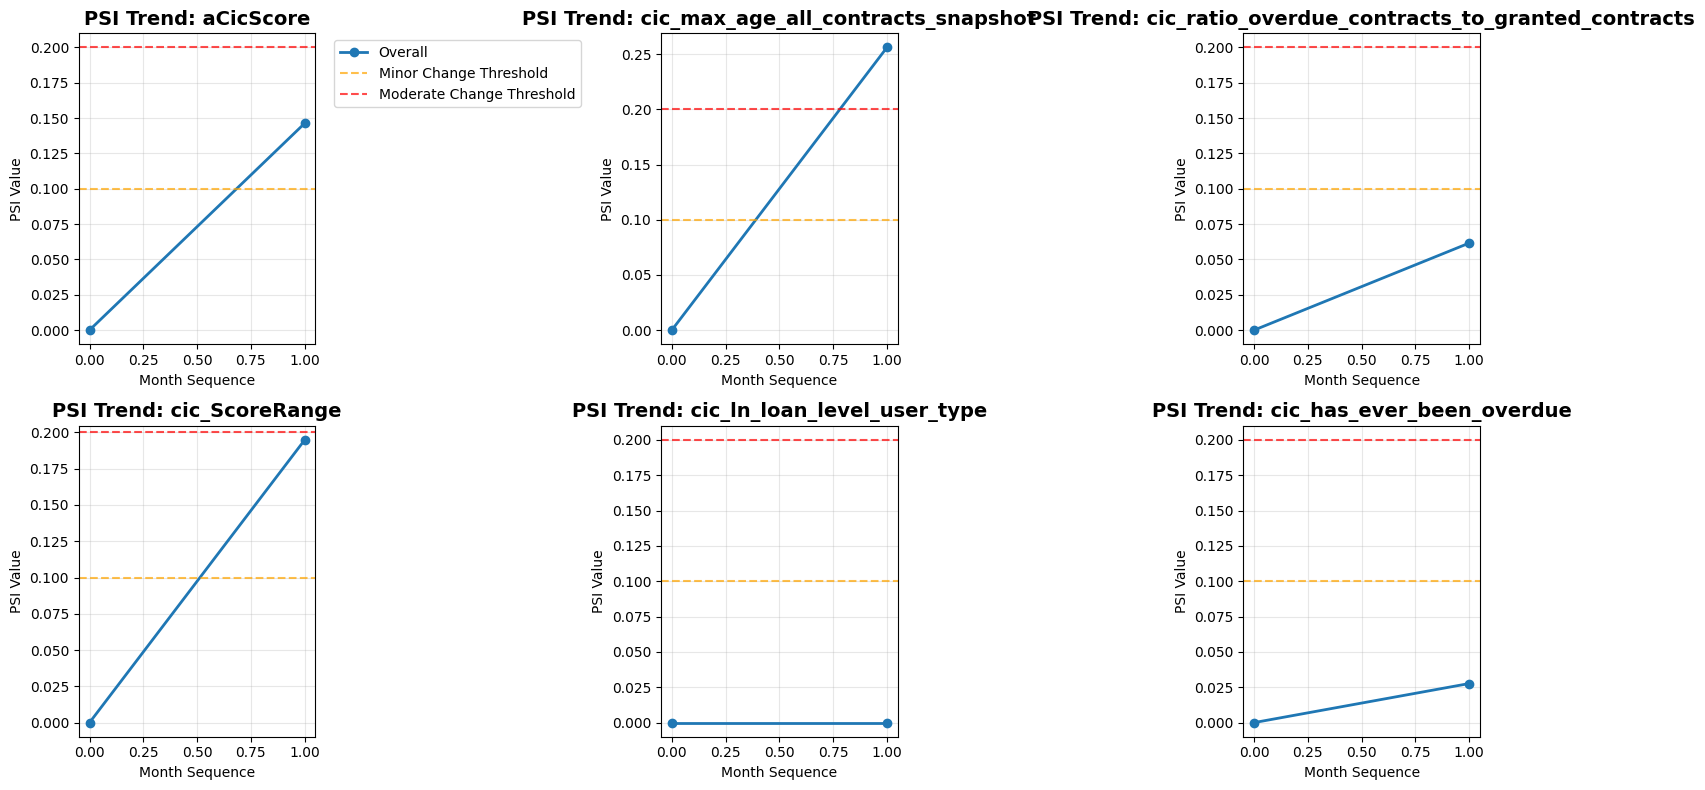

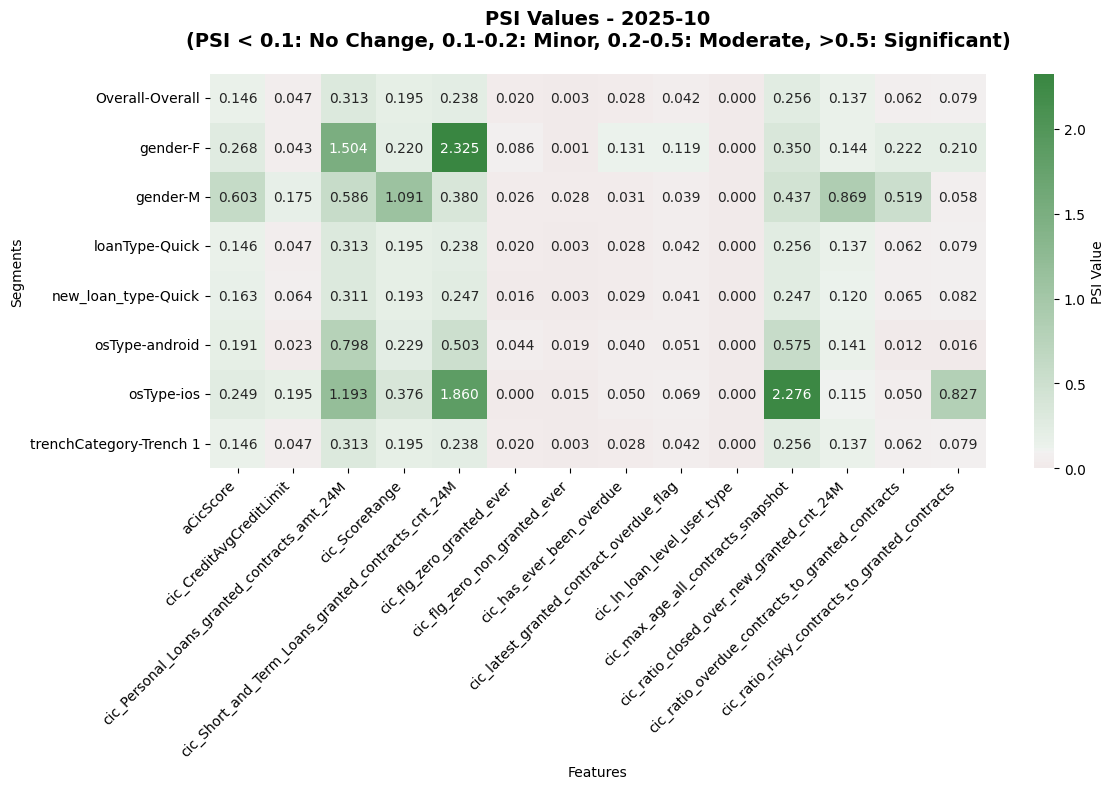

In [ ]:
# # Run the analysis
# if __name__ == "__main__":
#     psi_results, bin_psi_results = example_usage()
#     pass

In [95]:
psi_results.head()

,feature,feature_type,segment_column,segment_value,baseline_month,current_month,psi,num_baseline_records,num_current_records,psi_interpretation,plot_month,month_sequence,modelDisplayName,modelVersionId,trenchCategory
0,aCicScore,numerical,Overall,Overall,2025-09,2025-09,0.000000,86,86,No significant change,2025-09,0,Alpha-Cash-CIC-Model,v1,Trench 1
1,aCicScore,numerical,Overall,Overall,2025-09,2025-10,0.146304,86,428,Minor change,2025-10,1,Alpha-Cash-CIC-Model,v1,Trench 1
56,aCicScore,numerical,gender,F,2025-09,2025-09,0.000000,60,60,No significant change,2025-09,0,Alpha-Cash-CIC-Model,v1,Trench 1
57,aCicScore,numerical,gender,F,2025-09,2025-10,0.268327,60,234,Moderate change,2025-10,1,Alpha-Cash-CIC-Model,v1,Trench 1
84,aCicScore,numerical,gender,M,2025-09,2025-09,0.000000,26,26,No significant change,2025-09,0,Alpha-Cash-CIC-Model,v1,Trench 1
